In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import csv
import math
import random
import scipy.io as io
from settings_config import *
from preprocessing import *
from dimensionality_reduction import *
from sklearn import svm, naive_bayes,discriminant_analysis,model_selection
from sklearn.metrics import mean_squared_error,accuracy_score
from sklearn.model_selection import cross_val_score,StratifiedShuffleSplit
from sklearn.feature_selection import RFE, RFECV, SequentialFeatureSelector
from scipy.stats import iqr,entropy,pearsonr
from sklearn.decomposition import PCA
import itertools as it
from scipy.signal import correlate
from matplotlib.lines import Line2D
from matplotlib.patches import Arc
from mpl_toolkits.mplot3d import Axes3D

In [3]:
plt.rcParams.update({'font.family':'serif'})

In [4]:
likelihood_EMT16, positions_EMT16, angles_EMT16 = get_likelihood_positions_angles_nans(EMT16_path,length_EMT16,\
                                                                              likelihood_threshold=0.8,labels_format='46/16')
likelihood_EMT46_2, positions_EMT46_2, angles_EMT46_2 = get_likelihood_positions_angles_nans(EMT46_2_path,length_EMT46_2,\
                                                                              likelihood_threshold=0.75,labels_format='46/16')
likelihood_EMT19, positions_EMT19, angles_EMT19 = get_likelihood_positions_angles_nans(EMT19_path,length_EMT19,\
                                                                                              likelihood_threshold=0.75)
likelihood_EMT28, positions_EMT28, angles_EMT28 = get_likelihood_positions_angles_nans(EMT28_path,length_EMT28,\
                                                                                              likelihood_threshold=0.75)
likelihood_EMT45, positions_EMT45, angles_EMT45 = get_likelihood_positions_angles_nans(EMT45_path,length_EMT45,\
                                                                                 likelihood_threshold=0.85,labels_format='45')
likelihood_subject45, positions_subject45, angles_subject45 = get_likelihood_positions_angles_nans(subject45_path,\
                                                                 length_subject45,likelihood_threshold=0.85,labels_format='45')
likelihood_EMT48, positions_EMT48, angles_EMT48 = get_likelihood_positions_angles_nans(EMT48_path,length_EMT48,\
                                                                                              likelihood_threshold=0.75)
likelihood_EMT17, positions_EMT17, angles_EMT17 = get_likelihood_positions_angles_nans(EMT17_path,length_EMT17,\
                                                                                              likelihood_threshold=0.75)
likelihood_EMT47, positions_EMT47, angles_EMT47 = get_likelihood_positions_angles_nans(EMT47_path,length_EMT47,\
                                                                                              likelihood_threshold=0.75)
likelihood_EMT18, positions_EMT18, angles_EMT18 = get_likelihood_positions_angles_nans(EMT18_path,length_EMT18,\
                                                                                              likelihood_threshold=0.75)

In [5]:
angles_videos =  [angles_EMT19,angles_EMT16,angles_EMT17,angles_EMT18,angles_EMT28,angles_EMT46_2,angles_EMT48,angles_EMT47]#,angles_EMT45,angles_subject45]
labels = ['Early mild 1','Early mild 2','Early mild 3','Early mild 4','Late mild 1','Late mild 2','Late mild 3','Late mild 4']#,'Typical 1','Typical 2']
babies = [0,0,0,0,1,1,1,1]

In [6]:
angles_EMT45_ = delete_nans(angles_EMT45)
angles_subject45_ = delete_nans(angles_subject45)
angles_EMT16_ = delete_nans(angles_EMT16)
angles_EMT46_2_ = delete_nans(angles_EMT46_2)
angles_EMT19_ = delete_nans(angles_EMT19)
angles_EMT28_ = delete_nans(angles_EMT28)
angles_EMT17_ = delete_nans(angles_EMT17)
angles_EMT48_ = delete_nans(angles_EMT48)
angles_EMT18_ = delete_nans(angles_EMT18)
angles_EMT47_ = delete_nans(angles_EMT47)
angles_ =  [angles_EMT19_,angles_EMT16_,angles_EMT17_,angles_EMT18_,angles_EMT28_,angles_EMT46_2_,angles_EMT48_,angles_EMT47_]#,angles_EMT45,angles_subject45]


There are 5590 frames with high likelihood
There are 7540 frames with high likelihood
There are 4207 frames with high likelihood
There are 5927 frames with high likelihood
There are 11485 frames with high likelihood
There are 11451 frames with high likelihood
There are 11993 frames with high likelihood
There are 13661 frames with high likelihood
There are 12868 frames with high likelihood
There are 14907 frames with high likelihood


In [7]:
corr_babies = []
for i in range(len(angles_)):
    corr_babies.append(abs(np.corrcoef(angles_[i])))

In [8]:
vars_labels = ['L elbow mean','R elbow mean', 'L arm mean','R arm mean',
              'L knee mean','R knee mean', 'L leg mean','R leg mean',
              'L elbow std','R elbow std', 'L arm std','R arm std',
              'L knee std','R knee std', 'L leg std','R leg std',
              'L elbow median vel','R elbow median vel', 'L arm median vel','R arm median vel',
              'L knee median vel','R knee median vel', 'L leg median vel','R leg median vel',
              'L elbow IQR vel','R elbow IQR vel', 'L arm IQR vel','R arm IQR vel',
              'L knee IQR vel','R knee IQR vel', 'L leg IQR vel','R leg IQR vel',
              'L elbow median acc','R elbow median acc', 'L arm median acc','R arm median acc',
              'L knee median acc','R knee median acc', 'L leg median acc','R leg median acc',
              'L elbow IQR acc','R elbow IQR acc', 'L arm IQR acc','R arm IQR acc',
              'L knee IQR acc','R knee IQR acc', 'L leg IQR acc','R leg IQR acc',
              'L elbow entropy','R elbow entropy', 'L arm entropy','R arm entropy',
              'L knee entropy','R knee entropy', 'L leg entropy','R leg entropy',
              'L elbow vel entropy','R elbow vel entropy', 'L arm vel entropy','R arm vel entropy',
              'L knee vel entropy','R knee vel entropy', 'L leg vel entropy','R leg vel entropy',
              'L elbow acc entropy','R elbow acc entropy', 'L arm acc entropy','R arm acc entropy',
              'L knee acc entropy','R knee acc entropy', 'L leg acc entropy','R leg acc entropy',
              'trunk std','trunk entropy',
              'L elbow head corr', 'R elbow head corr','L arm head corr', 'R arm head corr',
              'L knee head corr', 'R knee head corr','L leg head corr', 'R leg head corr']

colors = ['grey','grey','grey','grey','grey','grey','grey','grey',
          'red','red','red','red','red','red','red','red',
         'blue','blue','blue','blue','blue','blue','blue','blue',
         'deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue','deepskyblue',
         'green','green','green','green','green','green','green','green',
         'lime','lime','lime','lime','lime','lime','lime','lime',
         'yellow','yellow','yellow','yellow','yellow','yellow','yellow','yellow',
          'orange','orange','orange','orange','orange','orange','orange','orange',
          'darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange','darkorange',
          'grey','silver',
         'magenta','magenta','magenta','magenta','magenta','magenta','magenta','magenta']

def get_movement_variables(angles_videos):
    # Mean angles, std angles, median angular velocity, IQR angular velocity, 
    # IQR of angular acceleration, angular crosscorrelation, angular entropy.
    # returns nxm matrix (n number of babies videos, m number of variables)
    variables = np.empty((len(angles_videos),len(vars_labels)))
    for i,video in enumerate(angles_videos):
        L_elbow = video[angle_idx['L_elbow'],:].copy();L_elbow=L_elbow[~np.isnan(L_elbow)]
        R_elbow = video[angle_idx['R_elbow'],:].copy();R_elbow=R_elbow[~np.isnan(R_elbow)]
        L_arm = video[angle_idx['L_arm'],:].copy();L_arm=L_arm[~np.isnan(L_arm)]
        R_arm = video[angle_idx['R_arm'],:].copy();R_arm=R_arm[~np.isnan(R_arm)]
        L_knee = video[angle_idx['L_knee'],:].copy();L_knee=L_knee[~np.isnan(L_knee)]
        R_knee = video[angle_idx['R_knee'],:].copy();R_knee=R_knee[~np.isnan(R_knee)]
        L_leg = video[angle_idx['L_leg'],:].copy();L_leg=L_leg[~np.isnan(L_leg)]
        R_leg = video[angle_idx['R_leg'],:].copy();R_leg=R_leg[~np.isnan(R_leg)]
        variables[i,vars_labels.index('L elbow mean')] = np.nanmean(video[angle_idx['L_elbow'],:])
        variables[i,vars_labels.index('R elbow mean')] = np.nanmean(video[angle_idx['R_elbow'],:])
        variables[i,vars_labels.index('L arm mean')] = np.nanmean(video[angle_idx['L_arm'],:])
        variables[i,vars_labels.index('R arm mean')] = np.nanmean(video[angle_idx['R_arm'],:])
        variables[i,vars_labels.index('L knee mean')] = np.nanmean(video[angle_idx['L_knee'],:])
        variables[i,vars_labels.index('R knee mean')] = np.nanmean(video[angle_idx['R_knee'],:])
        variables[i,vars_labels.index('L leg mean')] = np.nanmean(video[angle_idx['L_leg'],:])
        variables[i,vars_labels.index('R leg mean')] = np.nanmean(video[angle_idx['R_leg'],:])
        variables[i,vars_labels.index('L elbow std')] = np.nanstd(video[angle_idx['L_elbow'],:])
        variables[i,vars_labels.index('R elbow std')] = np.nanstd(video[angle_idx['R_elbow'],:])
        variables[i,vars_labels.index('L arm std')] = np.nanstd(video[angle_idx['L_arm'],:])
        variables[i,vars_labels.index('R arm std')] = np.nanstd(video[angle_idx['R_arm'],:])
        variables[i,vars_labels.index('L knee std')] = np.nanstd(video[angle_idx['L_knee'],:])
        variables[i,vars_labels.index('R knee std')] = np.nanstd(video[angle_idx['R_knee'],:])
        variables[i,vars_labels.index('L leg std')] = np.nanstd(video[angle_idx['L_leg'],:])
        variables[i,vars_labels.index('R leg std')] = np.nanstd(video[angle_idx['R_leg'],:])
        L_elbow_vel = abs(np.diff(video[angle_idx['L_elbow'],:]))
        R_elbow_vel = abs(np.diff(video[angle_idx['R_elbow'],:]))
        L_arm_vel = abs(np.diff(video[angle_idx['L_arm'],:]))
        R_arm_vel = abs(np.diff(video[angle_idx['R_arm'],:]))
        L_knee_vel = abs(np.diff(video[angle_idx['L_knee'],:]))
        R_knee_vel = abs(np.diff(video[angle_idx['R_knee'],:]))
        L_leg_vel = abs(np.diff(video[angle_idx['L_leg'],:]))
        R_leg_vel = abs(np.diff(video[angle_idx['R_leg'],:]))
        variables[i,vars_labels.index('L elbow median vel')] = np.nanmedian(L_elbow_vel)
        variables[i,vars_labels.index('R elbow median vel')] = np.nanmedian(R_elbow_vel)
        variables[i,vars_labels.index('L arm median vel')] = np.nanmedian(L_arm_vel)
        variables[i,vars_labels.index('R arm median vel')] = np.nanmedian(R_arm_vel)
        variables[i,vars_labels.index('L knee median vel')] = np.nanmedian(L_knee_vel)
        variables[i,vars_labels.index('R knee median vel')] = np.nanmedian(R_knee_vel)
        variables[i,vars_labels.index('L leg median vel')] = np.nanmedian(L_leg_vel)
        variables[i,vars_labels.index('R leg median vel')] = np.nanmedian(R_leg_vel)
        variables[i,vars_labels.index('L elbow IQR vel')] = iqr(L_elbow_vel[~np.isnan(L_elbow_vel)])       
        variables[i,vars_labels.index('R elbow IQR vel')] = iqr(R_elbow_vel[~np.isnan(R_elbow_vel)])
        variables[i,vars_labels.index('L arm IQR vel')] = iqr(L_arm_vel[~np.isnan(L_arm_vel)])
        variables[i,vars_labels.index('R arm IQR vel')] = iqr(R_arm_vel[~np.isnan(R_arm_vel)])
        variables[i,vars_labels.index('L knee IQR vel')] = iqr(L_knee_vel[~np.isnan(L_knee_vel)])
        variables[i,vars_labels.index('R knee IQR vel')] = iqr(R_knee_vel[~np.isnan(R_knee_vel)])
        variables[i,vars_labels.index('L leg IQR vel')] = iqr(L_leg_vel[~np.isnan(L_leg_vel)])
        variables[i,vars_labels.index('R leg IQR vel')] = iqr(R_leg_vel[~np.isnan(R_leg_vel)])
        L_elbow_acc = abs(np.diff(L_elbow_vel))
        R_elbow_acc = abs(np.diff(R_elbow_vel))
        L_arm_acc = abs(np.diff(L_arm_vel))
        R_arm_acc = abs(np.diff(R_arm_vel))
        L_knee_acc = abs(np.diff(L_knee_vel))
        R_knee_acc = abs(np.diff(R_knee_vel))
        L_leg_acc = abs(np.diff(L_leg_vel))
        R_leg_acc = abs(np.diff(R_leg_vel))
        variables[i,vars_labels.index('L elbow median acc')] = np.nanmedian(L_elbow_acc)
        variables[i,vars_labels.index('R elbow median acc')] = np.nanmedian(R_elbow_acc)
        variables[i,vars_labels.index('L arm median acc')] = np.nanmedian(L_arm_acc)
        variables[i,vars_labels.index('R arm median acc')] = np.nanmedian(R_arm_acc)
        variables[i,vars_labels.index('L knee median acc')] = np.nanmedian(L_knee_acc)
        variables[i,vars_labels.index('R knee median acc')] = np.nanmedian(R_knee_acc)
        variables[i,vars_labels.index('L leg median acc')] = np.nanmedian(L_leg_acc)
        variables[i,vars_labels.index('R leg median acc')] = np.nanmedian(R_leg_acc)
        variables[i,vars_labels.index('L elbow IQR acc')] = iqr(L_elbow_acc[~np.isnan(L_elbow_acc)]) 
        variables[i,vars_labels.index('R elbow IQR acc')] = iqr(R_elbow_acc[~np.isnan(R_elbow_acc)]) 
        variables[i,vars_labels.index('L arm IQR acc')] = iqr(L_arm_acc[~np.isnan(L_arm_acc)]) 
        variables[i,vars_labels.index('R arm IQR acc')] = iqr(R_arm_acc[~np.isnan(R_arm_acc)]) 
        variables[i,vars_labels.index('L knee IQR acc')] = iqr(L_knee_acc[~np.isnan(L_knee_acc)]) 
        variables[i,vars_labels.index('R knee IQR acc')] = iqr(R_knee_acc[~np.isnan(R_knee_acc)]) 
        variables[i,vars_labels.index('L leg IQR acc')] = iqr(L_leg_acc[~np.isnan(L_leg_acc)]) 
        variables[i,vars_labels.index('R leg IQR acc')] = iqr(R_leg_acc[~np.isnan(R_leg_acc)])
        elbows_ = np.array([video[angle_idx['L_elbow'],:].copy(),video[angle_idx['R_elbow'],:].copy()]); elbows = delete_nans(elbows_)
        arms_ = np.array([video[angle_idx['L_arm'],:].copy(),video[angle_idx['R_arm'],:].copy()]); arms = delete_nans(arms_)
        knees_ = np.array([video[angle_idx['L_knee'],:].copy(),video[angle_idx['R_knee'],:].copy()]); knees = delete_nans(knees_)
        legs_ = np.array([video[angle_idx['L_leg'],:].copy(),video[angle_idx['R_leg'],:].copy()]); legs = delete_nans(legs_)
        variables[i,vars_labels.index('L elbow entropy')] = entropy(np.histogram(L_elbow,bins=10,range=(0,np.pi))[0],base=2)
        variables[i,vars_labels.index('R elbow entropy')] = entropy(np.histogram(R_elbow,bins=10,range=(0,np.pi))[0],base=2)
        variables[i,vars_labels.index('L arm entropy')] = entropy(np.histogram(L_arm,bins=10,range=(0,np.pi))[0],base=2)
        variables[i,vars_labels.index('R arm entropy')] = entropy(np.histogram(R_arm,bins=10,range=(0,np.pi))[0],base=2)
        variables[i,vars_labels.index('L knee entropy')] = entropy(np.histogram(L_knee,bins=10,range=(0,np.pi))[0],base=2)
        variables[i,vars_labels.index('R knee entropy')] = entropy(np.histogram(R_knee,bins=10,range=(0,np.pi))[0],base=2)
        variables[i,vars_labels.index('L leg entropy')] = entropy(np.histogram(L_leg,bins=10,range=(0,np.pi))[0],base=2)
        variables[i,vars_labels.index('R leg entropy')] = entropy(np.histogram(R_leg,bins=10,range=(0,np.pi))[0],base=2)
        variables[i,vars_labels.index('L elbow vel entropy')] = entropy(np.histogram(L_elbow_vel[~np.isnan(L_elbow_vel)],bins=10,range=(0,0.15))[0],base=2)
        variables[i,vars_labels.index('R elbow vel entropy')] = entropy(np.histogram(R_elbow_vel[~np.isnan(R_elbow_vel)],bins=10,range=(0,0.15))[0],base=2)
        variables[i,vars_labels.index('L arm vel entropy')] = entropy(np.histogram(L_arm_vel[~np.isnan(L_arm_vel)],bins=10,range=(0,0.15))[0],base=2)
        variables[i,vars_labels.index('R arm vel entropy')] = entropy(np.histogram(R_arm_vel[~np.isnan(R_arm_vel)],bins=10,range=(0,0.15))[0],base=2)
        variables[i,vars_labels.index('L knee vel entropy')] = entropy(np.histogram(L_knee_vel[~np.isnan(L_knee_vel)],bins=10,range=(0,0.15))[0],base=2)
        variables[i,vars_labels.index('R knee vel entropy')] = entropy(np.histogram(R_knee_vel[~np.isnan(R_knee_vel)],bins=10,range=(0,0.15))[0],base=2)
        variables[i,vars_labels.index('L leg vel entropy')] = entropy(np.histogram(L_leg_vel[~np.isnan(L_leg_vel)],bins=10,range=(0,0.15))[0],base=2)
        variables[i,vars_labels.index('R leg vel entropy')] = entropy(np.histogram(R_leg_vel[~np.isnan(R_leg_vel)],bins=10,range=(0,0.15))[0],base=2)
        variables[i,vars_labels.index('L elbow acc entropy')] = entropy(np.histogram(L_elbow_acc[~np.isnan(L_elbow_acc)],bins=10,range=(0,0.2))[0],base=2)
        variables[i,vars_labels.index('R elbow acc entropy')] = entropy(np.histogram(R_elbow_acc[~np.isnan(R_elbow_acc)],bins=10,range=(0,0.2))[0],base=2)
        variables[i,vars_labels.index('L arm acc entropy')] = entropy(np.histogram(L_arm_acc[~np.isnan(L_arm_acc)],bins=10,range=(0,0.2))[0],base=2)
        variables[i,vars_labels.index('R arm acc entropy')] = entropy(np.histogram(R_arm_acc[~np.isnan(R_arm_acc)],bins=10,range=(0,0.2))[0],base=2)
        variables[i,vars_labels.index('L knee acc entropy')] = entropy(np.histogram(L_knee_acc[~np.isnan(L_knee_acc)],bins=10,range=(0,0.2))[0],base=2)
        variables[i,vars_labels.index('R knee acc entropy')] = entropy(np.histogram(R_knee_acc[~np.isnan(R_knee_acc)],bins=10,range=(0,0.2))[0],base=2)
        variables[i,vars_labels.index('L leg acc entropy')] = entropy(np.histogram(L_leg_acc[~np.isnan(L_leg_acc)],bins=10,range=(0,0.2))[0],base=2)
        variables[i,vars_labels.index('R leg acc entropy')] = entropy(np.histogram(R_leg_acc[~np.isnan(R_leg_acc)],bins=10,range=(0,0.2))[0],base=2)
        
        variables[i,vars_labels.index('trunk std')] = np.mean([
            np.nanstd(video[angle_idx['L_upper_trunk'],:]),
            np.nanstd(video[angle_idx['R_upper_trunk'],:]),
            np.nanstd(video[angle_idx['L_lower_trunk'],:]),
            np.nanstd(video[angle_idx['R_lower_trunk'],:]),
        ])
        L_upper_trunk = video[angle_idx['L_upper_trunk'],:].copy();L_upper_trunk=L_upper_trunk[~np.isnan(L_upper_trunk)]
        R_upper_trunk = video[angle_idx['R_upper_trunk'],:].copy();R_upper_trunk=R_upper_trunk[~np.isnan(R_upper_trunk)]
        L_lower_trunk = video[angle_idx['L_lower_trunk'],:].copy();L_lower_trunk=L_lower_trunk[~np.isnan(L_lower_trunk)]
        R_lower_trunk = video[angle_idx['R_lower_trunk'],:].copy();R_lower_trunk=R_lower_trunk[~np.isnan(R_lower_trunk)]
        variables[i,vars_labels.index('trunk entropy')] = np.mean([
            entropy(np.histogram(L_upper_trunk,bins=10)[0],base=2),
            entropy(np.histogram(R_upper_trunk,bins=10)[0],base=2),
            entropy(np.histogram(L_lower_trunk,bins=10)[0],base=2),
            entropy(np.histogram(R_lower_trunk,bins=10)[0],base=2)
        ])
        
        corr_matrix = abs(np.corrcoef(delete_nans(video)))
        variables[i,vars_labels.index('L elbow head corr')] = np.mean([
            corr_matrix[angle_idx['L_elbow'],angle_idx['L_nose_shoulders']],
            corr_matrix[angle_idx['L_elbow'],angle_idx['R_nose_shoulders']]])
        variables[i,vars_labels.index('R elbow head corr')] = np.mean([
            corr_matrix[angle_idx['R_elbow'],angle_idx['L_nose_shoulders']],
            corr_matrix[angle_idx['R_elbow'],angle_idx['R_nose_shoulders']]])
        variables[i,vars_labels.index('L arm head corr')] = np.mean([
            corr_matrix[angle_idx['L_arm'],angle_idx['L_nose_shoulders']],
            corr_matrix[angle_idx['L_arm'],angle_idx['R_nose_shoulders']]])
        variables[i,vars_labels.index('R arm head corr')] = np.mean([
            corr_matrix[angle_idx['R_arm'],angle_idx['L_nose_shoulders']],
            corr_matrix[angle_idx['R_arm'],angle_idx['R_nose_shoulders']]])
        variables[i,vars_labels.index('L knee head corr')] = np.mean([
            corr_matrix[angle_idx['L_knee'],angle_idx['L_nose_shoulders']],
            corr_matrix[angle_idx['L_knee'],angle_idx['R_nose_shoulders']]])
        variables[i,vars_labels.index('R knee head corr')] = np.mean([
            corr_matrix[angle_idx['R_knee'],angle_idx['L_nose_shoulders']],
            corr_matrix[angle_idx['R_knee'],angle_idx['R_nose_shoulders']]])
        variables[i,vars_labels.index('L leg head corr')] = np.mean([
            corr_matrix[angle_idx['L_leg'],angle_idx['L_nose_shoulders']],
            corr_matrix[angle_idx['L_leg'],angle_idx['R_nose_shoulders']]])
        variables[i,vars_labels.index('R leg head corr')] = np.mean([
            corr_matrix[angle_idx['R_leg'],angle_idx['L_nose_shoulders']],
            corr_matrix[angle_idx['R_leg'],angle_idx['R_nose_shoulders']]])
    return variables

def standardize(data):
    data_ = np.empty_like(data)
    for i,time_series in enumerate(data):
        data_[i] = data[i] - np.nanmean(data[i])
        std = np.nanstd(data[i])
        if std != 0:
            data_[i] = data_[i]/std
    return data_

In [9]:
vars_labels_mean = [#'elbows mean', 'arms mean', 'knees mean', 'legs mean',
              'elbows SD', 'arms SD', 'knees SD', 'legs SD',
              'elbows entropy', 'arms entropy', 'knees entropy', 'legs entropy',
              'elbows median vel.', 'arms median vel.', 'knees median vel.', 'legs median vel.',
              'elbows IQR vel.', 'arms IQR vel.', 'knees IQR vel.', 'legs IQR vel.',
              'elbows vel. entropy', 'arms vel. entropy', 'knees vel. entropy', 'legs vel. entropy',
              'elbows median acc.', 'arms median acc.', 'knees median acc.', 'legs median acc.',
              'elbows IQR acc.', 'arms IQR acc.', 'knees IQR acc.', 'legs IQR acc.',
              'elbows acc. entropy', 'arms acc. entropy', 'knees acc. entropy', 'legs acc. entropy'
              #'trunk std','trunk entropy'
              #'elbows head corr.','arms head corr.','knees head corr.','legs head corr.'
            ]

colors_mean = [#'tomato','tomato','tomato','tomato',
               'red','red','red','red',
         'orange','orange','orange','orange',
         'deepskyblue','deepskyblue','deepskyblue','deepskyblue',
         'blue','blue','blue','blue',
        'navy','navy','navy','navy',
        'lime','lime','lime','lime',
        'green','green','green','green',
         'yellow','yellow','yellow','yellow'
         #'grey','silver',
         #'magenta','magenta','magenta','magenta'
        ]

In [10]:
vars_labels_mean = [#'elbows mean', 'arms mean', 'knees mean', 'legs mean',
              'elbows SD', 'arms SD', 'knees SD', 'legs SD',
              'elbows median vel.', 'arms median vel.', 'knees median vel.', 'legs median vel.',
              'elbows IQR vel.', 'arms IQR vel.', 'knees IQR vel.', 'legs IQR vel.',
              'elbows median acc.', 'arms median acc.', 'knees median acc.', 'legs median acc.',
              'elbows IQR acc.', 'arms IQR acc.', 'knees IQR acc.', 'legs IQR acc.',
              'elbows entropy', 'arms entropy', 'knees entropy', 'legs entropy',
              'elbows vel. entropy', 'arms vel. entropy', 'knees vel. entropy', 'legs vel. entropy',
              'elbows acc. entropy', 'arms acc. entropy', 'knees acc. entropy', 'legs acc. entropy'
              #'trunk std','trunk entropy'
              #'elbows head corr.','arms head corr.','knees head corr.','legs head corr.'
            ]
vars_labels_mean2 = [#'elbows mean', 'shoulders mean', 'knees mean', 'hips mean',
              'elbows SD', 'shoulders SD', 'knees SD', 'hips SD',
              'elbows median vel.', 'shoulders median vel.', 'knees median vel.', 'hips median vel.',
              'elbows IQR vel.', 'shoulders IQR vel.', 'knees IQR vel.', 'hips IQR vel.',
              'elbows median acc.', 'shoulders median acc.', 'knees median acc.', 'hips median acc.',
              'elbows IQR acc.', 'shoulders IQR acc.', 'knees IQR acc.', 'hips IQR acc.',
              'elbows entropy', 'shoulders entropy', 'knees entropy', 'hips entropy',
              'elbows vel. entropy', 'shoulders vel. entropy', 'knees vel. entropy', 'hips vel. entropy',
              'elbows acc. entropy', 'shoulders acc. entropy', 'knees acc. entropy', 'hips acc. entropy'
              #'trunk std','trunk entropy'
              #'elbows head corr.','arms head corr.','knees head corr.','legs head corr.'
            ]

colors_mean = [#'tomato','tomato','tomato','tomato',
               'red','red','red','red',
         'deepskyblue','deepskyblue','deepskyblue','deepskyblue',
         'blue','blue','blue','blue',
        'lime','lime','lime','lime',
        'green','green','green','green',
         'yellow','yellow','yellow','yellow',
         'orange','orange','orange','orange',
         'peru','peru','peru','peru'
         #'grey','silver',
         #'magenta','magenta','magenta','magenta'
        ]

def get_movement_variables_mean(angles_videos):
    variables_mean = np.empty((len(angles_videos),len(vars_labels_mean)))
    variables = get_movement_variables(angles_videos)
    for i in range(len(angles_videos)):
        '''
        variables_mean[i,vars_labels_mean.index('elbows mean')] = np.mean([variables[i,vars_labels.index('L elbow mean')],
                                                                    variables[i,vars_labels.index('R elbow mean')]])
        variables_mean[i,vars_labels_mean.index('arms mean')] = np.mean([variables[i,vars_labels.index('L arm mean')],
                                                                    variables[i,vars_labels.index('R arm mean')]])
        variables_mean[i,vars_labels_mean.index('knees mean')] = np.mean([variables[i,vars_labels.index('L knee mean')],
                                                                    variables[i,vars_labels.index('R knee mean')]])
        variables_mean[i,vars_labels_mean.index('legs mean')] = np.mean([variables[i,vars_labels.index('L leg mean')],
                                                                    variables[i,vars_labels.index('R leg mean')]])
        '''                                                    
        variables_mean[i,vars_labels_mean.index('elbows SD')] = np.mean([variables[i,vars_labels.index('L elbow std')],
                                                                    variables[i,vars_labels.index('R elbow std')]])
        variables_mean[i,vars_labels_mean.index('arms SD')] = np.mean([variables[i,vars_labels.index('L arm std')],
                                                                    variables[i,vars_labels.index('R arm std')]])
        variables_mean[i,vars_labels_mean.index('knees SD')] = np.mean([variables[i,vars_labels.index('L knee std')],
                                                                    variables[i,vars_labels.index('R knee std')]])
        variables_mean[i,vars_labels_mean.index('legs SD')] = np.mean([variables[i,vars_labels.index('L leg std')],
                                                                    variables[i,vars_labels.index('R leg std')]])
                                                                    
        variables_mean[i,vars_labels_mean.index('elbows entropy')] = np.mean([variables[i,vars_labels.index('L elbow entropy')],
                                                                    variables[i,vars_labels.index('R elbow entropy')]])
        variables_mean[i,vars_labels_mean.index('arms entropy')] = np.mean([variables[i,vars_labels.index('L arm entropy')],
                                                                    variables[i,vars_labels.index('R arm entropy')]])
        variables_mean[i,vars_labels_mean.index('knees entropy')] = np.mean([variables[i,vars_labels.index('L knee entropy')],
                                                                    variables[i,vars_labels.index('R knee entropy')]])
        variables_mean[i,vars_labels_mean.index('legs entropy')] = np.mean([variables[i,vars_labels.index('L leg entropy')],
                                                                    variables[i,vars_labels.index('R leg entropy')]])

        variables_mean[i,vars_labels_mean.index('elbows median vel.')] = np.mean([variables[i,vars_labels.index('L elbow median vel')],
                                                                    variables[i,vars_labels.index('R elbow median vel')]])
        variables_mean[i,vars_labels_mean.index('arms median vel.')] = np.mean([variables[i,vars_labels.index('L arm median vel')],
                                                                    variables[i,vars_labels.index('R arm median vel')]])
        variables_mean[i,vars_labels_mean.index('knees median vel.')] = np.mean([variables[i,vars_labels.index('L knee median vel')],
                                                                    variables[i,vars_labels.index('R knee median vel')]])
        variables_mean[i,vars_labels_mean.index('legs median vel.')] = np.mean([variables[i,vars_labels.index('L leg median vel')],
                                                                    variables[i,vars_labels.index('R leg median vel')]])
        variables_mean[i,vars_labels_mean.index('elbows median acc.')] = np.mean([variables[i,vars_labels.index('L elbow median acc')],
                                                                    variables[i,vars_labels.index('R elbow median acc')]])
        variables_mean[i,vars_labels_mean.index('arms median acc.')] = np.mean([variables[i,vars_labels.index('L arm median acc')],
                                                                    variables[i,vars_labels.index('R arm median acc')]])
        variables_mean[i,vars_labels_mean.index('knees median acc.')] = np.mean([variables[i,vars_labels.index('L knee median acc')],
                                                                    variables[i,vars_labels.index('R knee median acc')]])
        variables_mean[i,vars_labels_mean.index('legs median acc.')] = np.mean([variables[i,vars_labels.index('L leg median acc')],
                                                                    variables[i,vars_labels.index('R leg median acc')]])
        
        variables_mean[i,vars_labels_mean.index('elbows IQR vel.')] = np.mean([variables[i,vars_labels.index('L elbow IQR vel')],
                                                                    variables[i,vars_labels.index('R elbow IQR vel')]])
        variables_mean[i,vars_labels_mean.index('arms IQR vel.')] = np.mean([variables[i,vars_labels.index('L arm IQR vel')],
                                                                    variables[i,vars_labels.index('R arm IQR vel')]])
        variables_mean[i,vars_labels_mean.index('knees IQR vel.')] = np.mean([variables[i,vars_labels.index('L knee IQR vel')],
                                                                    variables[i,vars_labels.index('R knee IQR vel')]])
        variables_mean[i,vars_labels_mean.index('legs IQR vel.')] = np.mean([variables[i,vars_labels.index('L leg IQR vel')],
                                                                    variables[i,vars_labels.index('R leg IQR vel')]])
        
        variables_mean[i,vars_labels_mean.index('elbows IQR acc.')] = np.mean([variables[i,vars_labels.index('L elbow IQR acc')],
                                                                    variables[i,vars_labels.index('R elbow IQR acc')]])
        variables_mean[i,vars_labels_mean.index('arms IQR acc.')] = np.mean([variables[i,vars_labels.index('L arm IQR acc')],
                                                                    variables[i,vars_labels.index('R arm IQR acc')]])
        variables_mean[i,vars_labels_mean.index('knees IQR acc.')] = np.mean([variables[i,vars_labels.index('L knee IQR acc')],
                                                                    variables[i,vars_labels.index('R knee IQR acc')]])
        variables_mean[i,vars_labels_mean.index('legs IQR acc.')] = np.mean([variables[i,vars_labels.index('L leg IQR acc')],
                                                                    variables[i,vars_labels.index('R leg IQR acc')]])
        
        variables_mean[i,vars_labels_mean.index('elbows vel. entropy')] = np.mean([variables[i,vars_labels.index('L elbow vel entropy')],
                                                                    variables[i,vars_labels.index('R elbow vel entropy')]])
        variables_mean[i,vars_labels_mean.index('arms vel. entropy')] = np.mean([variables[i,vars_labels.index('L arm vel entropy')],
                                                                    variables[i,vars_labels.index('R arm vel entropy')]])
        variables_mean[i,vars_labels_mean.index('knees vel. entropy')] = np.mean([variables[i,vars_labels.index('L knee vel entropy')],
                                                                    variables[i,vars_labels.index('R knee vel entropy')]])
        variables_mean[i,vars_labels_mean.index('legs vel. entropy')] = np.mean([variables[i,vars_labels.index('L leg vel entropy')],
                                                                    variables[i,vars_labels.index('R leg vel entropy')]])
        variables_mean[i,vars_labels_mean.index('elbows acc. entropy')] = np.mean([variables[i,vars_labels.index('L elbow acc entropy')],
                                                                    variables[i,vars_labels.index('R elbow acc entropy')]])
        variables_mean[i,vars_labels_mean.index('arms acc. entropy')] = np.mean([variables[i,vars_labels.index('L arm acc entropy')],
                                                                    variables[i,vars_labels.index('R arm acc entropy')]])
        variables_mean[i,vars_labels_mean.index('knees acc. entropy')] = np.mean([variables[i,vars_labels.index('L knee acc entropy')],
                                                                    variables[i,vars_labels.index('R knee acc entropy')]])
        variables_mean[i,vars_labels_mean.index('legs acc. entropy')] = np.mean([variables[i,vars_labels.index('L leg acc entropy')],
                                                                    variables[i,vars_labels.index('R leg acc entropy')]])
        '''
        variables_mean[i,vars_labels_mean.index('trunk std')] = variables[i,vars_labels.index('trunk std')]
        variables_mean[i,vars_labels_mean.index('trunk entropy')] = variables[i,vars_labels.index('trunk entropy')]
        
        variables_mean[i,vars_labels_mean.index('elbows head corr.')] = np.mean([variables[i,vars_labels.index('L elbow head corr')],
                                                                    variables[i,vars_labels.index('R elbow head corr')]])
        variables_mean[i,vars_labels_mean.index('arms head corr.')] = np.mean([variables[i,vars_labels.index('L arm head corr')],
                                                                    variables[i,vars_labels.index('R arm head corr')]])
        variables_mean[i,vars_labels_mean.index('knees head corr.')] = np.mean([variables[i,vars_labels.index('L knee head corr')],
                                                                    variables[i,vars_labels.index('R knee head corr')]])
        variables_mean[i,vars_labels_mean.index('legs head corr.')] = np.mean([variables[i,vars_labels.index('L leg head corr')],
                                                                    variables[i,vars_labels.index('R leg head corr')]])
        '''  
    return variables_mean,variables

In [11]:
corr_vars_labels = ['elbows corr.', 'arms corr.', 'knees corr.', 'legs corr.',
    'ipsil. elbows arms corr.','ipsil. elbows knees corr.','ipsil. elbows legs corr.',
                    'ipsil. arms knees corr.','ipsil. arms legs corr.','ipsil. knees legs corr.',
    'contral. elbows arms corr.','contral. elbows knees corr.','contral. elbows legs corr.',
                    'contral. arms knees corr.','contral. arms legs corr.','contral. knees legs corr.',
    #'elbows trunk corr','arms trunk corr','knees trunk corr','legs trunk corr',
    'elbows head corr.','arms head corr.','knees head corr.','legs head corr.']

corr_vars_labels2 = ['elbows corr.', 'shoulders corr.', 'knees corr.', 'hips corr.',
    'ipsil. elbows shoulders corr.','ipsil. elbows knees corr.','ipsil. elbows hips corr.',
                    'ipsil. shoulders knees corr.','ipsil. shoulders hips corr.','ipsil. knees hips corr.',
    'contral. elbows shoulders corr.','contral. elbows knees corr.','contral. elbows hips corr.',
                    'contral. shoulders knees corr.','contral. shoulders hips corr.','contral. knees hips corr.',
    #'elbows trunk corr','arms trunk corr','knees trunk corr','legs trunk corr',
    'elbows head corr.','shoulders head corr.','knees head corr.','hips head corr.']

corr_colors = ['magenta' for i in range(len(corr_vars_labels))]

def get_body_correlation(angles_videos):
    corr_vars = np.empty((len(angles_videos),len(corr_vars_labels)))
    for i,video in enumerate(angles_videos):
        corr_matrix = abs(np.corrcoef(delete_nans(video)))
        
        corr_vars[i,corr_vars_labels.index('elbows corr.')] = corr_matrix[angle_idx['L_elbow'],angle_idx['R_elbow']]
        corr_vars[i,corr_vars_labels.index('arms corr.')] = corr_matrix[angle_idx['L_arm'],angle_idx['R_arm']]
        corr_vars[i,corr_vars_labels.index('knees corr.')] = corr_matrix[angle_idx['L_knee'],angle_idx['R_knee']]
        corr_vars[i,corr_vars_labels.index('legs corr.')] = corr_matrix[angle_idx['L_leg'],angle_idx['R_leg']]
        corr_vars[i,corr_vars_labels.index('ipsil. elbows arms corr.')] = np.mean([
                    corr_matrix[angle_idx['L_elbow'],angle_idx['L_arm']],
                    corr_matrix[angle_idx['R_elbow'],angle_idx['R_arm']]])
        corr_vars[i,corr_vars_labels.index('contral. elbows arms corr.')] = np.mean([
                    corr_matrix[angle_idx['L_elbow'],angle_idx['R_arm']],
                    corr_matrix[angle_idx['R_elbow'],angle_idx['L_arm']]])
        corr_vars[i,corr_vars_labels.index('ipsil. elbows knees corr.')] = np.mean([
                    corr_matrix[angle_idx['L_elbow'],angle_idx['L_knee']],
                    corr_matrix[angle_idx['R_elbow'],angle_idx['R_knee']]])
        corr_vars[i,corr_vars_labels.index('contral. elbows knees corr.')] = np.mean([
                    corr_matrix[angle_idx['L_elbow'],angle_idx['R_knee']],
                    corr_matrix[angle_idx['R_elbow'],angle_idx['L_knee']]])
        corr_vars[i,corr_vars_labels.index('ipsil. elbows legs corr.')] = np.mean([
                    corr_matrix[angle_idx['L_elbow'],angle_idx['L_leg']],
                    corr_matrix[angle_idx['R_elbow'],angle_idx['R_leg']]])
        corr_vars[i,corr_vars_labels.index('contral. elbows legs corr.')] = np.mean([
                    corr_matrix[angle_idx['L_elbow'],angle_idx['R_leg']],
                    corr_matrix[angle_idx['R_elbow'],angle_idx['L_leg']]])
        '''
        corr_vars[i,corr_vars_labels.index('elbows trunk corr')] = np.mean([
                    corr_matrix[angle_idx['L_elbow'],angle_idx['L_upper_trunk']],
                    corr_matrix[angle_idx['L_elbow'],angle_idx['R_upper_trunk']],
                    corr_matrix[angle_idx['L_elbow'],angle_idx['L_lower_trunk']],
                    corr_matrix[angle_idx['L_elbow'],angle_idx['R_lower_trunk']],
                    corr_matrix[angle_idx['R_elbow'],angle_idx['L_upper_trunk']],
                    corr_matrix[angle_idx['R_elbow'],angle_idx['R_upper_trunk']],
                    corr_matrix[angle_idx['R_elbow'],angle_idx['L_lower_trunk']],
                    corr_matrix[angle_idx['R_elbow'],angle_idx['R_lower_trunk']]])'''
        corr_vars[i,corr_vars_labels.index('elbows head corr.')] = np.mean([
                    corr_matrix[angle_idx['L_elbow'],angle_idx['L_nose_shoulders']],
                    corr_matrix[angle_idx['L_elbow'],angle_idx['R_nose_shoulders']],
                    corr_matrix[angle_idx['R_elbow'],angle_idx['L_nose_shoulders']],
                    corr_matrix[angle_idx['R_elbow'],angle_idx['R_nose_shoulders']]])
        corr_vars[i,corr_vars_labels.index('ipsil. arms knees corr.')] = np.mean([
                    corr_matrix[angle_idx['L_arm'],angle_idx['L_knee']],
                    corr_matrix[angle_idx['R_arm'],angle_idx['R_knee']]])
        corr_vars[i,corr_vars_labels.index('contral. arms knees corr.')] = np.mean([
                    corr_matrix[angle_idx['L_arm'],angle_idx['R_knee']],
                    corr_matrix[angle_idx['R_arm'],angle_idx['L_knee']]])
        corr_vars[i,corr_vars_labels.index('ipsil. arms legs corr.')] = np.mean([
                    corr_matrix[angle_idx['L_arm'],angle_idx['L_leg']],
                    corr_matrix[angle_idx['R_arm'],angle_idx['R_leg']]])
        corr_vars[i,corr_vars_labels.index('contral. arms legs corr.')] = np.mean([
                    corr_matrix[angle_idx['L_arm'],angle_idx['R_leg']],
                    corr_matrix[angle_idx['R_arm'],angle_idx['L_leg']]])
        '''
        corr_vars[i,corr_vars_labels.index('arms trunk corr')] = np.mean([
                    corr_matrix[angle_idx['L_arm'],angle_idx['L_upper_trunk']],
                    corr_matrix[angle_idx['L_arm'],angle_idx['R_upper_trunk']],
                    corr_matrix[angle_idx['L_arm'],angle_idx['L_lower_trunk']],
                    corr_matrix[angle_idx['L_arm'],angle_idx['R_lower_trunk']],
                    corr_matrix[angle_idx['R_arm'],angle_idx['L_upper_trunk']],
                    corr_matrix[angle_idx['R_arm'],angle_idx['R_upper_trunk']],
                    corr_matrix[angle_idx['R_arm'],angle_idx['L_lower_trunk']],
                    corr_matrix[angle_idx['R_arm'],angle_idx['R_lower_trunk']]])'''
        corr_vars[i,corr_vars_labels.index('arms head corr.')] = np.mean([
                    corr_matrix[angle_idx['L_arm'],angle_idx['L_nose_shoulders']],
                    corr_matrix[angle_idx['L_arm'],angle_idx['R_nose_shoulders']],
                    corr_matrix[angle_idx['R_arm'],angle_idx['L_nose_shoulders']],
                    corr_matrix[angle_idx['R_arm'],angle_idx['R_nose_shoulders']]])
        corr_vars[i,corr_vars_labels.index('ipsil. knees legs corr.')] = np.mean([
                    corr_matrix[angle_idx['L_knee'],angle_idx['L_leg']],
                    corr_matrix[angle_idx['R_knee'],angle_idx['R_leg']]])
        corr_vars[i,corr_vars_labels.index('contral. knees legs corr.')] = np.mean([
                    corr_matrix[angle_idx['L_knee'],angle_idx['R_leg']],
                    corr_matrix[angle_idx['R_knee'],angle_idx['L_leg']]])
        '''
        corr_vars[i,corr_vars_labels.index('knees trunk corr')] = np.mean([
                    corr_matrix[angle_idx['L_knee'],angle_idx['L_upper_trunk']],
                    corr_matrix[angle_idx['L_knee'],angle_idx['R_upper_trunk']],
                    corr_matrix[angle_idx['L_knee'],angle_idx['L_lower_trunk']],
                    corr_matrix[angle_idx['L_knee'],angle_idx['R_lower_trunk']],
                    corr_matrix[angle_idx['R_knee'],angle_idx['L_upper_trunk']],
                    corr_matrix[angle_idx['R_knee'],angle_idx['R_upper_trunk']],
                    corr_matrix[angle_idx['R_knee'],angle_idx['L_lower_trunk']],
                    corr_matrix[angle_idx['R_knee'],angle_idx['R_lower_trunk']]])'''
        corr_vars[i,corr_vars_labels.index('knees head corr.')] = np.mean([
                    corr_matrix[angle_idx['L_knee'],angle_idx['L_nose_shoulders']],
                    corr_matrix[angle_idx['L_knee'],angle_idx['R_nose_shoulders']],
                    corr_matrix[angle_idx['R_knee'],angle_idx['L_nose_shoulders']],
                    corr_matrix[angle_idx['R_knee'],angle_idx['R_nose_shoulders']]])
        '''
        corr_vars[i,corr_vars_labels.index('legs trunk corr.')] = np.mean([
                    corr_matrix[angle_idx['L_leg'],angle_idx['L_upper_trunk']],
                    corr_matrix[angle_idx['L_leg'],angle_idx['R_upper_trunk']],
                    corr_matrix[angle_idx['L_leg'],angle_idx['L_lower_trunk']],
                    corr_matrix[angle_idx['L_leg'],angle_idx['R_lower_trunk']],
                    corr_matrix[angle_idx['R_leg'],angle_idx['L_upper_trunk']],
                    corr_matrix[angle_idx['R_leg'],angle_idx['R_upper_trunk']],
                    corr_matrix[angle_idx['R_leg'],angle_idx['L_lower_trunk']],
                    corr_matrix[angle_idx['R_leg'],angle_idx['R_lower_trunk']]])'''
        corr_vars[i,corr_vars_labels.index('legs head corr.')] = np.mean([
                    corr_matrix[angle_idx['L_leg'],angle_idx['L_nose_shoulders']],
                    corr_matrix[angle_idx['L_leg'],angle_idx['R_nose_shoulders']],
                    corr_matrix[angle_idx['R_leg'],angle_idx['L_nose_shoulders']],
                    corr_matrix[angle_idx['R_leg'],angle_idx['R_nose_shoulders']]])
    return corr_vars

In [12]:
all_vars_labels = vars_labels_mean+corr_vars_labels #[0:vars_labels_mean.index('elbows head corr.')]
all_vars_labels2 = vars_labels_mean2+corr_vars_labels2
all_vars_colors = colors_mean+corr_colors
def get_all_vars(angles_videos):
    variables_mean,_ = get_movement_variables_mean(angles_videos)
    body_corr = get_body_correlation(angles_videos)
    all_vars_ = np.concatenate([variables_mean,body_corr],axis=1)
    all_vars = standardize(all_vars_.T).T
    return all_vars

In [13]:
variables_mean_45,variables_45 = get_movement_variables_mean([angles_subject45,angles_EMT45])
variables_45_ = standardize(variables_45.T).T
variables_mean_45_ = standardize(variables_mean_45.T).T

variables_mean,variables = get_movement_variables_mean(angles_videos)
variables_ = standardize(variables.T).T
variables_mean_ = standardize(variables_mean.T).T

corr_vars_ = get_body_correlation(angles_videos)
corr_vars = standardize(corr_vars_.T).T
all_vars = get_all_vars(angles_videos)

There are 9353 frames with high likelihood
There are 9947 frames with high likelihood
There are 11133 frames with high likelihood
There are 10439 frames with high likelihood
There are 7540 frames with high likelihood
There are 7815 frames with high likelihood
There are 9194 frames with high likelihood
There are 15029 frames with high likelihood
There are 10598 frames with high likelihood
There are 5590 frames with high likelihood
There are 12624 frames with high likelihood
There are 15267 frames with high likelihood
There are 19421 frames with high likelihood
There are 18312 frames with high likelihood
There are 11485 frames with high likelihood
There are 8315 frames with high likelihood
There are 8592 frames with high likelihood
There are 6562 frames with high likelihood
There are 8829 frames with high likelihood
There are 4207 frames with high likelihood
There are 16773 frames with high likelihood
There are 16451 frames with high likelihood
There are 17034 frames with high likelihood

In [14]:
def cross_val(variables,babies):
    #cv = StratifiedShuffleSplit(n_splits=300, test_size=0.25)
    #acc = cross_val_score(discriminant_analysis.LinearDiscriminantAnalysis(n_components=1), all_vars, babies, cv=cv)
    accs =[]
    for i in range(1000):
        a = random.randint(0, 3)
        b = random.randint(4, 7)
        
        lda = discriminant_analysis.LinearDiscriminantAnalysis(n_components=1)
        vars = np.concatenate([variables[0:a,:],variables[a+1:b,:],variables[b+1:8,:]],axis=0)
        bab = np.delete(babies,[a,b])

        lda.fit_transform(vars,bab)
        y_pred_a = lda.predict([variables[a,:]])
        y_pred_b = lda.predict([variables[b,:]])
        accs.append(accuracy_score([babies[a],babies[b]],[y_pred_a,y_pred_b]))
    acc = np.mean(accs)
    print('Accuracy: {}%'.format(np.round(acc*100)))
    return acc

def cross_val_chance(X,y):
    accs = []
    for i in range(200):
        y_shuf = y.copy()
        random.shuffle(y_shuf)
        
        accs_ =[]
        for i in range(150):
            idx_zero = [i for i, x in enumerate(y_shuf) if x == 0]
            idx_one = [i for i, x in enumerate(y_shuf) if x == 1]
            a = random.choice(idx_zero)
            b = random.choice(idx_one)
            
            ab = np.array([a,b])
            lda = discriminant_analysis.LinearDiscriminantAnalysis(n_components=1)
            vars = np.concatenate([X[0:ab.min(),:],X[ab.min()+1:ab.max(),:],X[ab.max()+1:8,:]],axis=0)
            bab = np.delete(y_shuf,[a,b])

            lda.fit_transform(vars,bab)
            y_pred_a = lda.predict([X[a,:]])
            y_pred_b = lda.predict([X[b,:]])
            accs_.append(accuracy_score([y_shuf[a],y_shuf[b]],[y_pred_a,y_pred_b]))
        
        accs.append(np.mean(accs_))
    acc = np.mean(np.array(accs))
    print('Accuracy by chance: {}%'.format(np.round(acc*100)))
    return acc

def k_fold_cross_val(variables_mean_,babies):
    y_pred=[]
    for i in range(8):
        lda = discriminant_analysis.LinearDiscriminantAnalysis(n_components=1)
        vars = np.concatenate([variables_mean_[0:i,:],variables_mean_[i+1:8,:]],axis=0)
        bab = np.delete(babies,i)
        
        X = lda.fit_transform(vars,bab)
        #a = lda.transform(variables_mean_[7,:])
        y_pred.append(lda.predict([variables_mean_[i,:]]))
        print('')
        print(bab)
        print(lda.predict(vars))
        print(y_pred)
    acc = accuracy_score(babies,y_pred)
    return acc

def evaluate_decoders(X,y):
    lda = discriminant_analysis.LinearDiscriminantAnalysis()
    bayes = naive_bayes.GaussianNB()
    clf1 = svm.SVC(kernel='rbf')
    clf2 = svm.SVC(kernel='linear')
    svrs = [lda,bayes, clf1,clf2]
    names = ['LDA','Naive Bayes','SVM RBF','SVM linear']
    for i in range(4):
        svrs.append(svm.SVC(kernel='poly',degree=(i+1)))
        names.append('SVM poly degree {}'.format(i+1))
    for svr,name in zip(svrs,names):
        print(' - {}'.format(name))
        cv = StratifiedShuffleSplit(n_splits=300, test_size=0.25)
        accuracy = model_selection.cross_val_score(svr, X, y, cv=cv)
        svr.fit(X,y)
        #print(svr.predict(X))
        #print(accuracy)
        print('Accuracy: {} %'.format(np.round(np.mean(accuracy)*100)))
        #acc_chance = evaluate_shuffled_labels(svr,X, y)
        print('')

def evaluate_lda_svm(X,y):
    lda = discriminant_analysis.LinearDiscriminantAnalysis()
    clf = svm.SVC(kernel='linear')
    svrs = [lda, clf]
    names = ['LDA','SVM linear']
    for svr,name in zip(svrs,names):
        print(' - {}'.format(name))
        cv = StratifiedShuffleSplit(n_splits=300, test_size=0.25)
        accuracy = model_selection.cross_val_score(svr, X, y, cv=cv)
        print('Accuracy: {} %'.format(np.round(np.mean(accuracy)*100)))
        acc_chance = evaluate_shuffled_labels(svr,X, y)
        print('')

def evaluate_classifier(classifier,X,y):
    cv = StratifiedShuffleSplit(n_splits=300, test_size=0.25)
    accuracy = model_selection.cross_val_score(classifier, X, y, cv=cv)
    print('Accuracy: {} %'.format(np.round(np.mean(accuracy)*100)))
    acc_chance = evaluate_shuffled_labels(classifier,X, y)
    print('')
        
def plot_coefficients(classifier, X, y, feature_names, colors,save_fig=False):
    top_features = int(X.shape[1]/2)
    classifier.fit(X, y)
    #accuracy = model_selection.cross_val_score(classifier, X, y, cv=4)
    #print('Accuracy: {} %'.format(np.round(np.mean(accuracy)*100)))
    #print('')
    #acc_chance = evaluate_shuffled_labels(classifier,X, y)
    #print('')
    coef = abs(classifier.scalings_.ravel()) #coef
    top_positive_coefficients = np.argsort(coef)[-top_features:]
    top_negative_coefficients = np.argsort(coef)[:top_features]
    top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
    top_coefficients = top_coefficients[::-1]
    # create plot
    fig=plt.figure(figsize=(10, 3.9))
    #colors = ['red' if c < 0 else 'blue' for c in coef[top_coefficients]]
    plt.bar(np.arange(2 * top_features), coef[top_coefficients], color=[colors[i] for i in top_coefficients])
    feature_names = np.array(feature_names)
    #plt.xticks(np.arange(1, 1 + 2 * top_features), feature_names[top_coefficients], rotation=60, ha='right')
    plt.xticks(np.arange(2 * top_features), feature_names[top_coefficients], rotation=60, ha='right',size=11)
    #plt.title('LDA component weights', size=18)
    plt.ylabel('LDA component weights', size=13)
    patch1 = mpatches.Patch(color='magenta', label='Corr.')
    patch2 = mpatches.Patch(color='deepskyblue', label='Vel. IQR')
    patch3 = mpatches.Patch(color='blue', label='Vel. median')
    patch4 = mpatches.Patch(color='lime', label='Acc. IQR')
    #plt.legend(handles=[patch1,patch2,patch3,patch4],fontsize = 10)
    plt.tight_layout() 
    plt.show()
    if save_fig:
        fig.savefig('./figures/LDA_component_weights.png')
        fig.savefig('./figures/LDA_component_weights.eps',format='eps')

def sequential_feature_selection(classifier, X, y, vars_labels, colors,n_features_to_select=30,direction='forward'):
    cv = StratifiedShuffleSplit(n_splits=2000, test_size=0.25)
    #acc = cross_val_score(discriminant_analysis.LinearDiscriminantAnalysis(n_components=1), all_vars, babies, cv=cv)
    selector = SequentialFeatureSelector(classifier,n_features_to_select=n_features_to_select,direction=direction, cv=cv,n_jobs=-1)
    selector = selector.fit(X, y)
    take_features = np.where(selector.support_)[0]
    vars_labels_=[vars_labels[i] for i in take_features]
    colors_ = [colors[i] for i in take_features]
    X_ = X[:,take_features]
    plot_coefficients(classifier,X_, y, vars_labels_, colors_)
    return take_features
    
def feature_ranking_recursive_feature_elimination(classifier, X, y, vars_labels, colors):
    cv = StratifiedShuffleSplit(n_splits=300, test_size=0.25)
    selector = RFECV(classifier, step=1, cv=cv)
    selector = selector.fit(X, y)
    take_features = np.where(selector.support_)[0]
    vars_labels_=[vars_labels[i] for i in take_features]
    colors_ = [colors[i] for i in take_features]
    X_ = X[:,take_features]
    plot_coefficients(classifier,X_, y, vars_labels_, colors_)
    return take_features
    
def recursive_feature_elimination(classifier, X, y, vars_labels, colors,n_features_to_select=None):
    selector = RFE(classifier, step=1,n_features_to_select=n_features_to_select)
    selector = selector.fit(X, y)
    take_features = np.where(selector.support_)[0]
    vars_labels_=[vars_labels[i] for i in take_features]
    colors_ = [colors[i] for i in take_features]
    X_ = X[:,take_features]
    plot_coefficients(classifier,X_, y, vars_labels_, colors_)
    return take_features

def feature_alimination(vars,babies,labels,colors):

    print('Accuracy with all variables:')
    _=cross_val(vars,babies)
    #_=cross_val_chance(vars,babies)

    #take_features1 = recursive_feature_elimination(discriminant_analysis.LinearDiscriminantAnalysis(),
    #                              vars, babies, labels,colors)
    #_=cross_val(vars[:,take_features1],babies)
    #_=cross_val_chance(vars[:,take_features1],babies)
    print('FRRFE')
    take_features2 = feature_ranking_recursive_feature_elimination(discriminant_analysis.LinearDiscriminantAnalysis(),
                                  vars, babies, labels,colors)
    _=cross_val(vars[:,take_features2],babies)
    #_=cross_val_chance(vars[:,take_features2],babies)

    print('SFS')
    take_features3 = sequential_feature_selection(discriminant_analysis.LinearDiscriminantAnalysis(),
                                  vars, babies, labels,colors)
    _=cross_val(vars[:,take_features3],babies)
    #_=cross_val_chance(vars[:,take_features3],babies)
    return take_features2,take_features3

def evaluate_shuffled_labels(classifier,X,y):
    accs = []
    for i in range(100):
        y_shuf = y.copy()
        random.shuffle(y_shuf)
        cv = StratifiedShuffleSplit(n_splits=300, test_size=0.25)
        accs.append(model_selection.cross_val_score(classifier, X, y_shuf, cv=cv))
    acc = np.mean(np.array(accs))
    print('Accuracy by chance: {}%'.format(np.round(acc*100)))
    return acc

def evaluate_classifier_PCA(X,y):
    for i in range(8):
        print('{} dimensions'.format(i+1))
        pca = PCA(n_components=i+1)
        pca.fit(X)
        X_ = pca.transform(X)
        evaluate_lda_svm(X_,y)

def plot_LDA_component_weights(component,labels=vars_labels_mean,colors = colors_mean,save_fig=False):
    fig = plt.figure(figsize=(12, 3))
    #colors = ['red' if c < 0 else 'blue' for c in coef[top_coefficients]]
    plt.bar(np.arange(len(component)), component, color=colors)
    feature_names = np.array(labels)
    #plt.xticks(np.arange(1, 1 + 2 * top_features), feature_names[top_coefficients], rotation=60, ha='right')
    #plt.xticks(np.arange(1,1+len(component)), feature_names, rotation=60, ha='right',size=14)
    plt.xticks(np.arange(len(component)), feature_names, rotation=60, ha='right',size=14)
    plt.ylabel('LDA component weights', size=14)
    #plt.title('LDA component weights', size=18)
    plt.show()
    #fig.tight_layout()  
    if save_fig:
        fig.savefig('./figures/LDA_component_weights.png')
        
def plot_kinematic_vars_PCs(PCs,labels=vars_labels_mean,colors = colors_mean):
    n_PCs = len(PCs)
    #fig = plt.figure()#figsize=(15,n_PCs*5))

    for i,PC in enumerate(abs(PCs)):
        #plt.subplot(n_PCs,1,i+1)
        plt.figure(figsize=(12, 3))
        #colors = ['red' if c < 0 else 'blue' for c in coef[top_coefficients]]
        plt.bar(np.arange(len(PC)), PC, color=colors)
        feature_names = np.array(labels)
        #plt.xticks(np.arange(1, 1 + 2 * top_features), feature_names[top_coefficients], rotation=60, ha='right')
        plt.xticks(np.arange(len(PC)), feature_names, rotation=60, ha='right',size=14)
        plt.title('PC {} weights'.format(i+1), size=18)
        plt.show()
    #fig.tight_layout()  
    #fig.savefig('./figures/PCs_kinematic_variables_subspace.png')

def classifier_PCA(classifier,X,Y,n_components,labels=vars_labels_mean,colors = colors_mean):
    pca = PCA(n_components=n_components)
    pca.fit(X)
    PCs = pca.components_
    X = pca.transform(X)
    
    cross_val(X,Y)
    cross_val_chance(X,Y)
    
    #evaluate_classifier(classifier,X,Y)
    classifier.fit(X,Y)
    
    #y_pred = classifier.predict(X)
    #acc = accuracy_score(Y, y_pred)
    #print(acc)
    
    plot_kinematic_vars_PCs(PCs,labels,colors)
    
    if n_components == 2:
        # Plot the hyperplanes

        early_labels = ['Early mild 1','Early mild 2','Early mild 3','Early mild 4']
        late_labels = ['Late mild 1','Late mild 2','Late mild 3','Late mild 4']
        
        fig,ax = plt.subplots(figsize=(7,7))
        for l,c,label,early_late in zip(np.unique(Y),['b','r'],['Early','Late'],[early_labels,late_labels]):
            ax.scatter(X[Y==l,0], X[Y==l,1], c=c, label=label)
            for i in range(len(X[Y==l,0])):
                ax.annotate(early_late[i], (X[Y==l,0][i]-1.2, X[Y==l,1][i]+.3))

        x1 = np.array([np.min(X[:,0], axis=0), np.max(X[:,0], axis=0)])
        
        b, w1, w2 = classifier.intercept_[0], classifier.coef_[0][0], classifier.coef_[0][1]
        y1 = -(b+x1*w1)/w2    
        
        
        plt.plot(x1,y1,c='black')
        plt.xlim(-8,8)
        plt.ylim(-8,8)
        plt.xlabel('PC 1', size = plots_font_size)
        plt.ylabel('PC 2', size = plots_font_size)
        plt.title('LDA decision boundary', size = titles_font_size)
        red_patch = mpatches.Patch(color='b', label='Early')
        blue_patch = mpatches.Patch(color='r', label='Late')
        plt.legend(handles=[red_patch,blue_patch],fontsize = 12)
        #fig.legend(handles=[red_patch,blue_patch],fontsize = 12, loc='upper right', bbox_to_anchor=(1.05,1.05))
        fig.tight_layout() 
        plt.show()
            
    elif n_components == 3:
        z = lambda x,y: (-classifier.intercept_[0]-classifier.coef_[0][0]*x-classifier.coef_[0][1]*y) / classifier.coef_[0][2]

        tmp = np.linspace(-4,4,51)
        x,y = np.meshgrid(tmp,tmp)
        
        # Plot stuff.
        fig = plt.figure(figsize=(8,6))
        ax  = fig.add_subplot(111, projection='3d')
        print(X)
        print(X.shape)
        print(Y)
        print(X[Y==0])
        print(X[Y==0,0])
        ax.scatter(X[Y==0,0], X[Y==0,1], X[Y==0,2], color='blue',s = 50,alpha=1)#ob
        ax.scatter(X[Y==1,0], X[Y==1,1], X[Y==1,2], color='red',s = 50,alpha=1)

        surf = ax.plot_surface(x, y, z(x,y),color='grey',alpha=0.2)

        ax.set_xlabel('PC 1', size = plots_font_size)
        ax.set_ylabel('PC 2', size = plots_font_size)
        ax.set_zlabel('PC 3', size = plots_font_size)

        ax.set_xlim(-7,7)
        ax.set_ylim(-3,6)
        ax.set_zlim(-3,6)

        red_patch = mpatches.Patch(color='b', label='Early')
        blue_patch = mpatches.Patch(color='r', label='Late')
        fig.legend(handles=[red_patch,blue_patch],fontsize = 12, loc='upper right', bbox_to_anchor=(1.05,0.95))
        fig.tight_layout() 
        plt.show()
        #ax.view_init(60, 60)
        
        fig = plt.figure(figsize=(4,3))
        plt.scatter(X[Y==0,0], X[Y==0,1],color='b')
        plt.scatter(X[Y==1,0], X[Y==1,1],color='r')
        #cbar = fig.colorbar(p); cbar.ax.set_ylabel('Phi (deg)', size = plots_font_size)
        plt.xlabel('PC 1', size = plots_font_size)
        plt.ylabel('PC 2', size = plots_font_size)
        plt.title('PCA 2D projection on PC1 and PC2 axis', size = titles_font_size)

        fig = plt.figure(figsize=(4,3))
        plt.scatter(X[Y==0,1], X[Y==0,2],color='b')
        plt.scatter(X[Y==1,1], X[Y==1,2],color='r')
        #cbar = fig.colorbar(p); cbar.ax.set_ylabel('Phi (deg)', size = plots_font_size)
        plt.xlabel('PC 2', size = plots_font_size)
        plt.ylabel('PC 3', size = plots_font_size)
        plt.title('PCA 2D projection on PC2 and PC3 axis', size = titles_font_size)

        fig = plt.figure(figsize=(4,3))
        plt.scatter(X[Y==0,0], X[Y==0,2],color='b')
        plt.scatter(X[Y==1,0], X[Y==1,2],color='r')
        #cbar = fig.colorbar(p); cbar.ax.set_ylabel('Phi (deg)', size = plots_font_size)
        plt.xlabel('PC 1', size = plots_font_size)
        plt.ylabel('PC 3', size = plots_font_size)
        plt.title('PCA 2D projection on PC1 and PC3 axis', size = titles_font_size)
    return classifier,pca
        
def plot_features(X,y,take_features,labels=vars_labels_mean):
    fig = plt.figure(figsize=(16,math.ceil(len(take_features)/2+0.5)))
    plt.suptitle('Main features in development classification',y=1.05,size=titles_font_size)

    count = 1
    for i in take_features:
        #feature = variables_mean_[:,i]
        name = labels[i]
        plt.subplot(math.ceil(len(take_features)/2),2,count)
        count += 1
        for l,c,m,label in zip(np.unique(y),['b','r'],['s','o'],['Early','Late']):
            plt.scatter(X[y==l,i],[0,0,0,0],c=c)
                        #c=c, marker=m, label=label,edgecolors='black')
            #plt.legend()
        plt.title(name,size=16)
        plt.gca().axes.yaxis.set_ticks([])
    red_patch = mpatches.Patch(color='b', label='Early')
    blue_patch = mpatches.Patch(color='r', label='Late')
    fig.legend(handles=[red_patch,blue_patch],fontsize = 12, loc='upper right', bbox_to_anchor=(1.05,1.05))
    fig.tight_layout()  
    plt.show()
    

def LDA_dim_reduction(variables,babies,labels=vars_labels_mean,colors=colors_mean,xlim=[-2.6,2.6],
                      decision_boundary_label_pos=1.3,LDA_component_pos=2,save_figs=False):
    Y=babies
    lda = discriminant_analysis.LinearDiscriminantAnalysis(n_components=1)
    X = lda.fit_transform(variables,babies)
    #y_pred = lda.predict(variables_mean_45_)
    #print(y_pred)
        
    #print('Variance explained by this variable: {}'.format(lda.explained_variance_ratio_))
    
    cross_val(variables,babies)
    #cross_val_chance(variables,babies)
    
    #evaluate_classifier(lda,X,Y)
    # Plot the hyperplanes
    
    #print(X)
    #print(variables@lda.scalings_)
    #print(variables@lda.coef_.T)
    #print(lda.intercept_)

    early_labels = ['1','2','3','4']
    late_labels = ['1','2','3','4']

    fig,ax = plt.subplots(figsize=(7,2))
    plt.arrow(x=0, y=0, dx=xlim[0]+0.1, dy=0, width = 0.015, facecolor='grey', edgecolor='None') 
    plt.arrow(x=0, y=0, dx=xlim[1]-0.1, dy=0, width = 0.015, facecolor='grey', edgecolor='None') 
    #plt.plot([-2.5,2.5],[0,0],c='grey', zorder=1)
    #ax.annotate("", xy=(0, 0), xytext=(-2.5, 0), arrowprops=dict(arrowstyle="<-"),color='yellow', zorder=1)
    plt.plot([lda.intercept_,lda.intercept_],[-0.5,0.5],c='black')
    ax.annotate('Decision Boundary', (lda.intercept_-decision_boundary_label_pos, 0.3),size = 12)
    ax.annotate('LDA component', (LDA_component_pos, -0.3),size = 12)
    
    for l,c,label,early_late in zip(np.unique(Y),['b','r'],['Early','Late'],[early_labels,late_labels]):
        ax.scatter(X[Y==l,0], [0,0,0,0], c=c, label=label, zorder=2)
        for i in range(len(X[Y==l,0])):
            a = 0
            ax.annotate(early_late[i], (X[Y==l,0][i]-0.01, -0.3))    
    plt.xlim(xlim)
    plt.ylim(-1,1)
    plt.xlabel('LDA component', size = plots_font_size)
    plt.gca().axes.yaxis.set_ticks([])
    #plt.title('Dataset projection onto LDA component', size = titles_font_size)
    red_patch = mpatches.Patch(color='b', label='Early')
    blue_patch = mpatches.Patch(color='r', label='Late')
    line = Line2D([0], [0], label='Decision Boundary', color='black')
    plt.legend(handles=[red_patch,blue_patch],fontsize = 12)
    plt.axis('off')
    plt.tight_layout() 
    plt.show()
    if save_figs:
        fig.savefig('./figures/LDA_component_projection.png')
        fig.savefig('./figures/LDA_component_projection.eps',format='eps')
    scalings = abs(lda.scalings_.T[0])
    #plot_coefficients(discriminant_analysis.LinearDiscriminantAnalysis(n_components=1), variables, babies, labels, colors,save_figs)

    plot_LDA_component_weights(scalings,labels=labels,colors=colors)

    '''
    sd = np.sqrt(np.mean(scalings[all_vars_labels.index('elbows SD'):all_vars_labels.index('legs SD')+1]**2))
    entropy = np.sqrt(np.mean(scalings[all_vars_labels.index('elbows entropy'):all_vars_labels.index('legs entropy')+1]**2))
    vel_median = np.sqrt(np.mean(scalings[all_vars_labels.index('elbows median vel.'):all_vars_labels.index('legs median vel.')+1]**2))
    acc_median = np.sqrt(np.mean(scalings[all_vars_labels.index('elbows median acc.'):all_vars_labels.index('legs median acc.')+1]**2))
    vel_entropy = np.sqrt(np.mean(scalings[all_vars_labels.index('elbows vel. entropy'):all_vars_labels.index('legs vel. entropy')+1]**2))
    acc_entropy = np.sqrt(np.mean(scalings[all_vars_labels.index('elbows acc. entropy'):all_vars_labels.index('legs acc. entropy')+1]**2))
    corr_intralimb = np.sqrt(np.mean(scalings[all_vars_labels.index('elbows corr.'):all_vars_labels.index('legs corr.')+1]**2))
    corr_interlimb = np.sqrt(np.mean(scalings[all_vars_labels.index('ipsil. elbows arms corr.'):all_vars_labels.index('contral. knees legs corr.')+1]**2))
    corr_head_limb = np.sqrt(np.mean(scalings[all_vars_labels.index('elbows head corr.'):all_vars_labels.index('legs head corr.')+1]**2))
    '''
    sd = np.mean(scalings[all_vars_labels.index('elbows SD'):all_vars_labels.index('legs SD')+1])
    entropy = np.mean(scalings[all_vars_labels.index('elbows entropy'):all_vars_labels.index('legs entropy')+1])
    
    vel_median = np.mean(scalings[all_vars_labels.index('elbows median vel.'):all_vars_labels.index('legs median vel.')+1])
    acc_median = np.mean(scalings[all_vars_labels.index('elbows median acc.'):all_vars_labels.index('legs median acc.')+1])
    vel_iqr = np.mean(scalings[all_vars_labels.index('elbows IQR vel.'):all_vars_labels.index('legs IQR vel.')+1])
    acc_iqr = np.mean(scalings[all_vars_labels.index('elbows IQR acc.'):all_vars_labels.index('legs IQR acc.')+1])
    vel_entropy = np.mean(scalings[all_vars_labels.index('elbows vel. entropy'):all_vars_labels.index('legs vel. entropy')+1])
    acc_entropy = np.mean(scalings[all_vars_labels.index('elbows acc. entropy'):all_vars_labels.index('legs acc. entropy')+1])
    corr_intralimb = np.mean(scalings[all_vars_labels.index('elbows corr.'):all_vars_labels.index('legs corr.')+1])
    corr_interlimb = np.mean(scalings[all_vars_labels.index('ipsil. elbows arms corr.'):all_vars_labels.index('contral. knees legs corr.')+1])
    corr_head_limb = np.mean(scalings[all_vars_labels.index('elbows head corr.'):all_vars_labels.index('legs head corr.')+1])
    
    
    v = [sd,entropy,vel_median,acc_median,vel_iqr,acc_iqr,vel_entropy,acc_entropy,corr_intralimb,corr_interlimb,corr_head_limb]
    
    labels__ = ['SD','angular position entropy','angular velocity median','angular acceleration median',
                'angular velocity IQR','angular acceleration IQR',
                'angular velocity entropy','angular acceleration entropy','intralimb correlation',
               'interlimb correlation','head-limb correlation']
    colors__ = ['red','yellow','deepskyblue','lime','blue','green','orange','darkorange','magenta','magenta','magenta']

    #plot_LDA_component_weights(v,labels=labels__,colors=colors__)
    #plot_kinematic_vars_PCs(lda.coef_,labels=labels,colors=colors)
    
def plot_histogram(features,labels=all_vars_labels2,colors=all_vars_colors,save_fig=False):
    hist = np.histogram(features,bins=np.arange(len(labels)+1))[0]
    fig = plt.figure(figsize=(12, 5))
    plt.bar(np.arange(len(hist)), hist, color=colors)
    feature_names = np.array(labels)
    #plt.xticks(np.arange(1, 1 + 2 * top_features), feature_names[top_coefficients], rotation=60, ha='right')
    plt.xticks(np.arange(1,1+len(hist)), feature_names, rotation=60, ha='right',size=11)
    #plt.xticks(np.arange(len(hist)), feature_names, rotation=60, ha='right',size=12)
    plt.ylabel('# selected times', size=14)
    #plt.title('LDA component weights', size=18)
    patch1 = mpatches.Patch(color='red', label='Posture SD')
    patch2 = mpatches.Patch(color='deepskyblue', label='Vel. median')
    patch3 = mpatches.Patch(color='blue', label='Vel. IQR')
    patch4 = mpatches.Patch(color='lime', label='Acc. median')
    patch5 = mpatches.Patch(color='green', label='Acc. IQR')
    patch6 = mpatches.Patch(color='yellow', label='Posture entropy')
    patch7 = mpatches.Patch(color='orange', label='Vel. entropy')
    patch8 = mpatches.Patch(color='peru', label='Acc. entropy')
    patch9 = mpatches.Patch(color='magenta', label='Joints corr.')
    plt.legend(handles=[patch1,patch2,patch3,patch4,patch5,patch6,patch7,patch8,patch9],fontsize = 9, 
               loc='upper right', bbox_to_anchor=(1.17,1))
    plt.show()
    fig.tight_layout()  
    if save_fig:
        fig.savefig('./figures/feature_selection.png')

In [15]:
len(all_vars_labels)

52

In [16]:
all_vars_labels

['elbows SD',
 'arms SD',
 'knees SD',
 'legs SD',
 'elbows median vel.',
 'arms median vel.',
 'knees median vel.',
 'legs median vel.',
 'elbows IQR vel.',
 'arms IQR vel.',
 'knees IQR vel.',
 'legs IQR vel.',
 'elbows median acc.',
 'arms median acc.',
 'knees median acc.',
 'legs median acc.',
 'elbows IQR acc.',
 'arms IQR acc.',
 'knees IQR acc.',
 'legs IQR acc.',
 'elbows entropy',
 'arms entropy',
 'knees entropy',
 'legs entropy',
 'elbows vel. entropy',
 'arms vel. entropy',
 'knees vel. entropy',
 'legs vel. entropy',
 'elbows acc. entropy',
 'arms acc. entropy',
 'knees acc. entropy',
 'legs acc. entropy',
 'elbows corr.',
 'arms corr.',
 'knees corr.',
 'legs corr.',
 'ipsil. elbows arms corr.',
 'ipsil. elbows knees corr.',
 'ipsil. elbows legs corr.',
 'ipsil. arms knees corr.',
 'ipsil. arms legs corr.',
 'ipsil. knees legs corr.',
 'contral. elbows arms corr.',
 'contral. elbows knees corr.',
 'contral. elbows legs corr.',
 'contral. arms knees corr.',
 'contral. arm

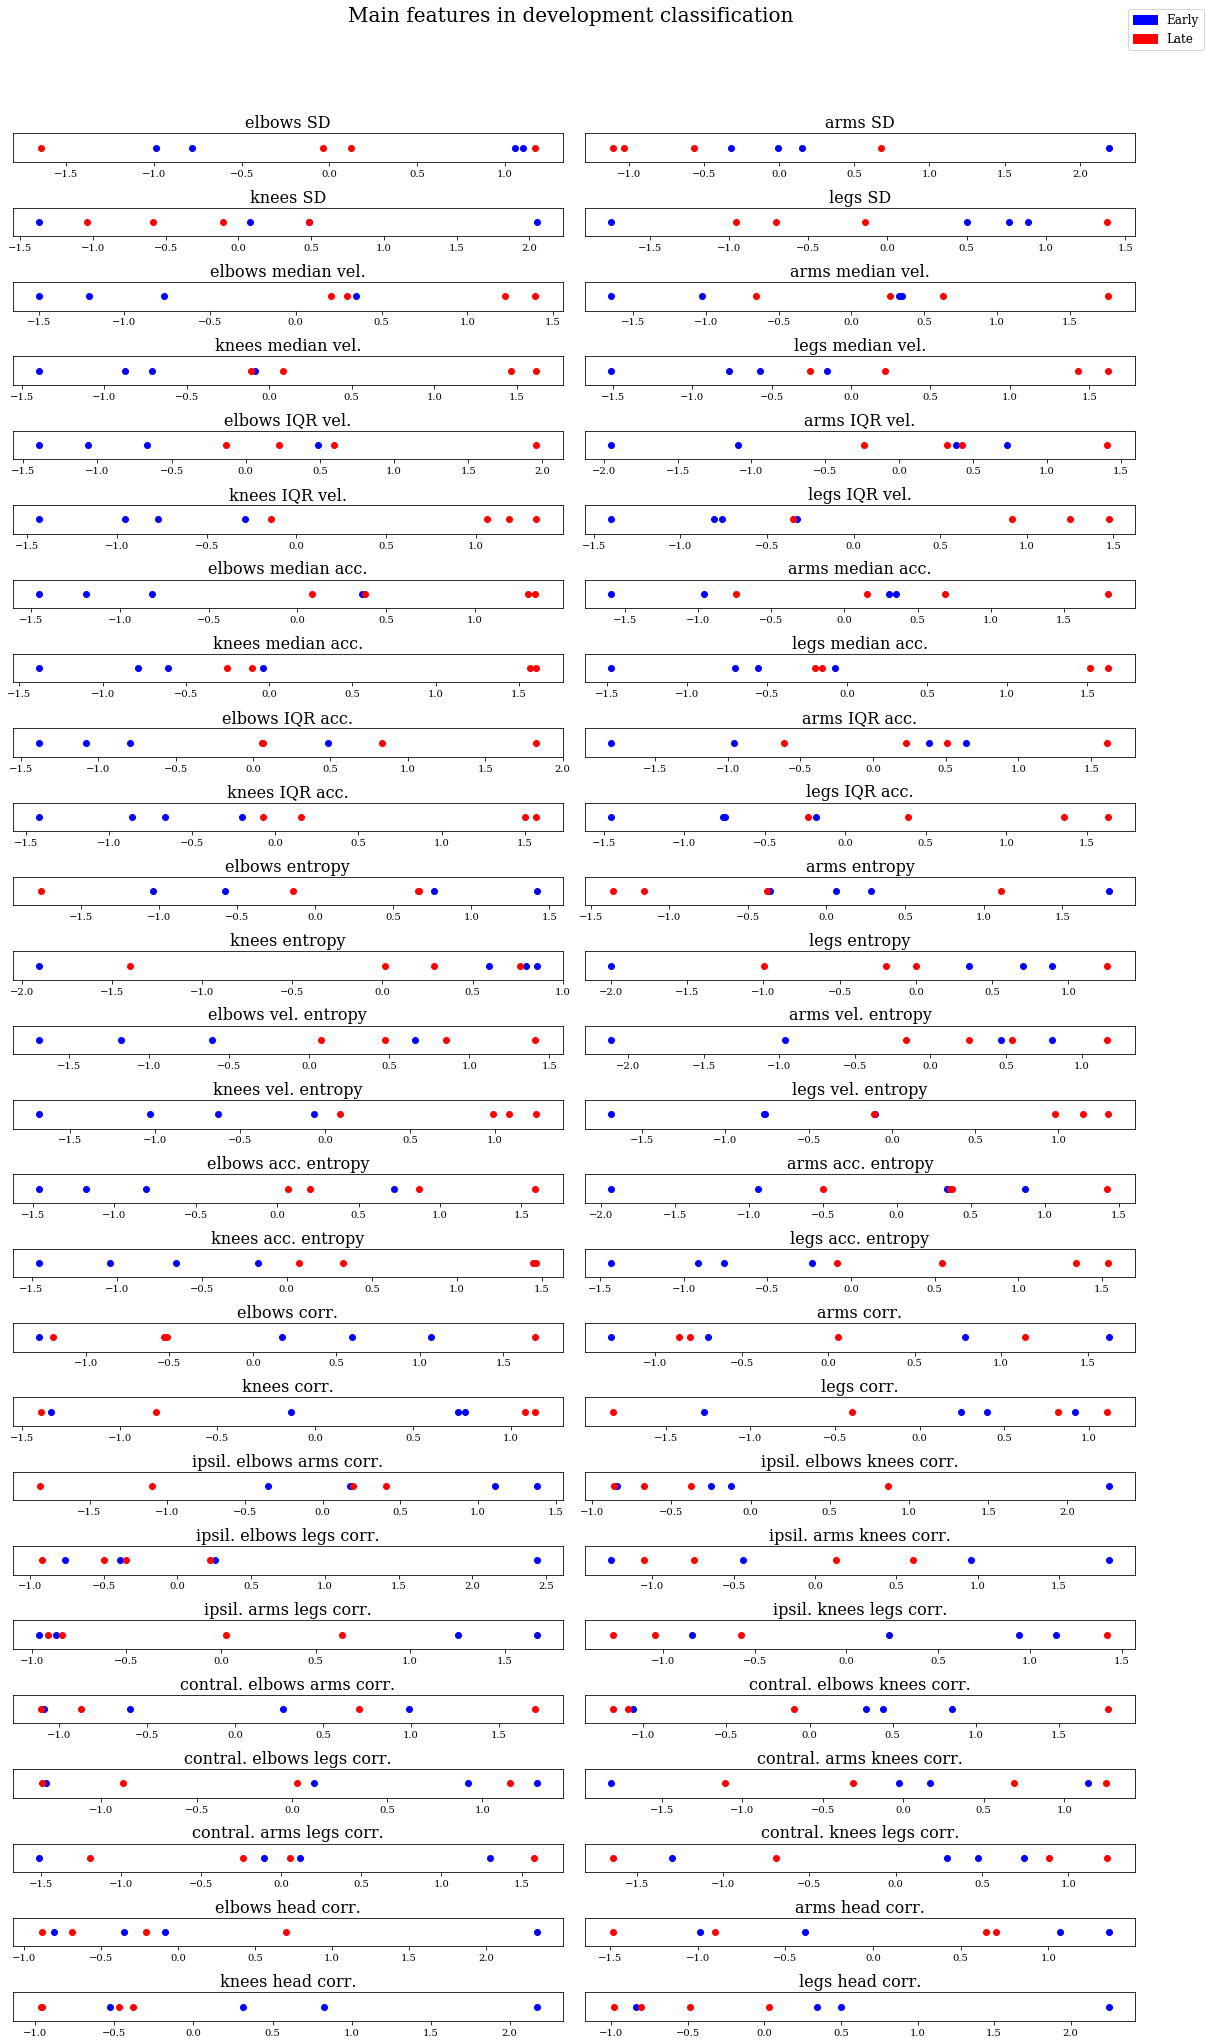

In [17]:
plot_features(all_vars,babies,np.arange(all_vars.shape[1]),labels=all_vars_labels)

## All variables

Accuracy: 93.0%


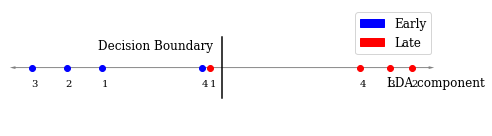

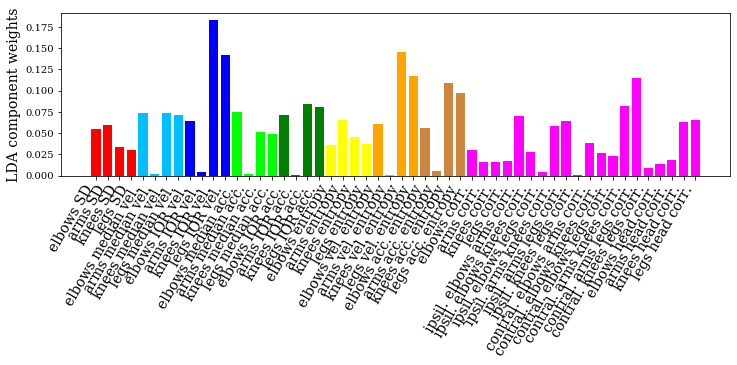

In [18]:
LDA_dim_reduction(all_vars,babies,all_vars_labels,all_vars_colors,decision_boundary_label_pos=1.5)

## Sequential feature selection

In [19]:
features=[]

In [20]:
# After deleting IQR
cv = StratifiedShuffleSplit(n_splits=300, test_size=0.25)
count=10
for i in range(1000):
    selector = SequentialFeatureSelector(discriminant_analysis.LinearDiscriminantAnalysis(),n_features_to_select=count,
                                         direction='forward', cv=cv,n_jobs=-1)
    selector = selector.fit(all_vars,babies)
    take_features = np.where(selector.support_)[0]
    features += take_features.tolist()
    print(i)
    print(count)
    count+=1
    if count==20:
        count=10

0
10
1
11
2
12
3
13
4
14
5
15
6
16
7
17
8
18
9
19
10
10
11
11
12
12
13
13
14
14
15
15
16
16
17
17
18
18
19
19
20
10
21
11
22
12
23
13
24
14
25
15
26
16
27
17
28
18
29
19
30
10
31
11
32
12
33
13
34
14
35
15
36
16
37
17
38
18
39
19
40
10
41
11
42
12
43
13
44
14
45
15
46
16
47
17
48
18
49
19
50
10
51
11
52
12
53
13
54
14
55
15
56
16
57
17
58
18
59
19
60
10
61
11
62
12
63
13
64
14
65
15
66
16
67
17
68
18
69
19
70
10
71
11
72
12
73
13
74
14
75
15
76
16
77
17
78
18
79
19
80
10
81
11
82
12
83
13
84
14
85
15
86
16
87
17
88
18
89
19
90
10
91
11
92
12
93
13
94
14
95
15
96
16
97
17
98
18
99
19
100
10
101
11
102
12
103
13
104
14
105
15
106
16
107
17
108
18
109
19
110
10
111
11
112
12
113
13
114
14
115
15
116
16
117
17
118
18
119
19
120
10
121
11
122
12
123
13
124
14
125
15
126
16
127
17
128
18
129
19
130
10
131
11
132
12
133
13
134
14
135
15
136
16
137
17
138
18
139
19
140
10
141
11
142
12
143
13
144
14
145
15
146
16
147
17
148
18
149
19
150
10
151
11
152
12
153
13
154
14
155
15
156
16
157
17
158


KeyboardInterrupt: 

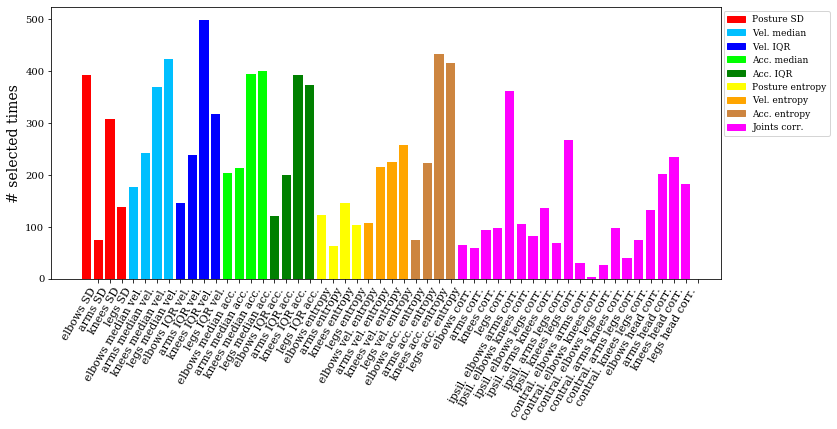

In [22]:
plot_histogram(features,all_vars_labels,all_vars_colors,save_fig=True)

## Getting velocity and acceleration

In [18]:
def get_early_late(var):
    early_ = []
    late_ = []
    for i in range(4):
        early_.append(var[i][angle_idx['L_elbow']:angle_idx['R_leg']+1,:].flatten())
        late_.append(var[i+4][angle_idx['L_elbow']:angle_idx['R_leg']+1,:].flatten())
    early = np.concatenate(early_)
    late = np.concatenate(late_)
    return early, late

def plot_angular_velocity_distribution(variable):
    plt.figure(figsize=(6,4))
    for i in range(len(angular_velocities)):
        plt.hist(angular_velocities[i][angle_idx[variable],:], density=True, bins='auto', color = colors[i], ec = colors[i], alpha=0.3,label=labels[i])
    #plt.plot([], [], ' ', label="Dimensions: {}".format(dims))
    plt.xlabel('Velocity (rads/s)',size=plots_font_size)
    plt.ylabel('Samples density',size=plots_font_size)
    plt.title('{} velocity distributions'.format(angle_labels_[angle_idx[variable]]), size=titles_font_size)
    plt.xlim(0,0.0025)
    plt.legend(fontsize = 12)
    plt.gca().axes.yaxis.set_ticks([])
    plt.show()

In [19]:
fs=50

In [20]:
acc_EMT16 = delete_nans(abs(np.diff(np.diff(angles_EMT16))))*fs*fs
acc_EMT46_2 = delete_nans(abs(np.diff(np.diff(angles_EMT46_2))))*fs*fs
acc_EMT19 = delete_nans(abs(np.diff(np.diff(angles_EMT19))))*fs*fs
acc_EMT28 = delete_nans(abs(np.diff(np.diff(angles_EMT28))))*fs*fs
acc_EMT17 = delete_nans(abs(np.diff(np.diff(angles_EMT17))))*fs*fs
acc_EMT18 = delete_nans(abs(np.diff(np.diff(angles_EMT18))))*fs*fs
acc_EMT47 = delete_nans(abs(np.diff(np.diff(angles_EMT47))))*fs*fs
acc_EMT48 = delete_nans(abs(np.diff(np.diff(angles_EMT48))))*fs*fs


There are 3765 frames with high likelihood
There are 4205 frames with high likelihood
There are 10589 frames with high likelihood
There are 10635 frames with high likelihood
There are 11341 frames with high likelihood
There are 12150 frames with high likelihood
There are 13884 frames with high likelihood
There are 12860 frames with high likelihood


In [21]:
angular_velocity_EMT16 = delete_nans(abs(np.diff(angles_EMT16)))*fs
angular_velocity_EMT46_2 = delete_nans(abs(np.diff(angles_EMT46_2)))*fs
angular_velocity_EMT19 = delete_nans(abs(np.diff(angles_EMT19)))*fs
angular_velocity_EMT28 = delete_nans(abs(np.diff(angles_EMT28)))*fs
angular_velocity_EMT17 = delete_nans(abs(np.diff(angles_EMT17)))*fs
angular_velocity_EMT18 = delete_nans(abs(np.diff(angles_EMT18)))*fs
angular_velocity_EMT47 = delete_nans(abs(np.diff(angles_EMT47)))*fs
angular_velocity_EMT48 = delete_nans(abs(np.diff(angles_EMT48)))*fs

There are 3930 frames with high likelihood
There are 4871 frames with high likelihood
There are 10954 frames with high likelihood
There are 10979 frames with high likelihood
There are 11621 frames with high likelihood
There are 12457 frames with high likelihood
There are 14314 frames with high likelihood
There are 13194 frames with high likelihood


In [22]:
angles_EMT16_ = delete_nans(angles_EMT16)
angles_EMT46_2_ = delete_nans(angles_EMT46_2)
angles_EMT19_ = delete_nans(angles_EMT19)
angles_EMT28_ = delete_nans(angles_EMT28)
angles_EMT17_ = delete_nans(angles_EMT17)
angles_EMT48_ = delete_nans(angles_EMT48)
angles_EMT18_ = delete_nans(angles_EMT18)
angles_EMT47_ = delete_nans(angles_EMT47)
angles_ =  [angles_EMT19_,angles_EMT16_,angles_EMT17_,angles_EMT18_,angles_EMT28_,angles_EMT46_2_,angles_EMT48_,angles_EMT47_]#,angles_EMT45,angles_subject45]


There are 4207 frames with high likelihood
There are 5927 frames with high likelihood
There are 11485 frames with high likelihood
There are 11451 frames with high likelihood
There are 11993 frames with high likelihood
There are 13661 frames with high likelihood
There are 12868 frames with high likelihood
There are 14907 frames with high likelihood


In [23]:
angular_velocities = [angular_velocity_EMT19,angular_velocity_EMT16,angular_velocity_EMT17,angular_velocity_EMT18,
                     angular_velocity_EMT28,angular_velocity_EMT46_2,angular_velocity_EMT48,angular_velocity_EMT47]
angular_accelerations = [acc_EMT19,acc_EMT16,acc_EMT17,acc_EMT18, acc_EMT28,acc_EMT46_2,acc_EMT48,acc_EMT47]
colors = ['cyan','deepskyblue','blue','darkblue','yellow','orange','darkorange','red']

In [30]:
early_velocities,late_velocities = get_early_late(angular_velocities)
early_acc,late_acc= get_early_late(angular_accelerations)

In [31]:
early_std = np.concatenate(variables[0:4,vars_labels.index('L elbow std'):vars_labels.index('R leg std')+1])
late_std = np.concatenate(variables[4:8,vars_labels.index('L elbow std'):vars_labels.index('R leg std')+1])
early_entropy = np.concatenate(variables[0:4,vars_labels.index('L elbow entropy'):vars_labels.index('R leg entropy')+1])
late_entropy = np.concatenate(variables[4:8,vars_labels.index('L elbow entropy'):vars_labels.index('R leg entropy')+1])

In [32]:
early_vel_entropy = np.concatenate(variables[0:4,vars_labels.index('L elbow vel entropy'):vars_labels.index('R leg vel entropy')+1])
late_vel_entropy = np.concatenate(variables[4:8,vars_labels.index('L elbow vel entropy'):vars_labels.index('R leg vel entropy')+1])
early_acc_entropy = np.concatenate(variables[0:4,vars_labels.index('L elbow acc entropy'):vars_labels.index('R leg acc entropy')+1])
late_acc_entropy = np.concatenate(variables[4:8,vars_labels.index('L elbow acc entropy'):vars_labels.index('R leg acc entropy')+1])

In [33]:
corr_babies = []
for i in range(len(angles_)):
    corr_babies.append(abs(np.corrcoef(angles_[i])))

# Comparing kinematic features for babies of different ages

In [26]:
def arms_corr(var):
    combinations = list(it.combinations([0,1,4,5], 2))
    early = []
    late = []
    for i in range(4):
        for comb in combinations:
            early.append(var[i][comb[0],comb[1]])
            late.append(var[i+4][comb[0],comb[1]])
    plot_variable_early_vs_late(early,late,'Arms correlation')
    return early, late

def legs_corr(var):
    combinations = list(it.combinations([2,3,6,7], 2))
    early = []
    late = []
    for i in range(4):
        for comb in combinations:
            early.append(var[i][comb[0],comb[1]])
            late.append(var[i+4][comb[0],comb[1]])
    plot_variable_early_vs_late(early,late,'Legs correlation')
    return early, late

def trunk_corr(var):
    combinations = list(it.combinations([8,9,10,11], 2))
    early = []
    late = []
    for i in range(4):
        for comb in combinations:
            early.append(var[i][comb[0],comb[1]])
            late.append(var[i+4][comb[0],comb[1]])
    plot_variable_early_vs_late(early,late,'Trunk correlation')
    return early, late

def all_body_corr(var):
    combinations = list(it.combinations(list(range(14)), 2))
    early = []
    late = []
    for i in range(4):
        for comb in combinations:
            early.append(var[i][comb[0],comb[1]])
            late.append(var[i+4][comb[0],comb[1]])
    plot_variable_early_vs_late(early,late,'All body parts correlation')#,save_fig='Early_late_all_body_parts_correlation_comparison')
    return early, late

def contralateral_corr(corr_babies):
    combinations = [[0,1],[0,3],[0,5],[0,7],[1,2],[1,4],[1,6],[2,3],[2,5],[2,7],[3,4],[3,6],[4,5],[4,7],[5,6],[6,7]]
    early = []
    late = []
    for i in range(4):
        for comb in combinations:
            early.append(corr_babies[i][comb[0],comb[1]])
            late.append(corr_babies[i+4][comb[0],comb[1]])
    plot_variable_early_vs_late(early,late,'Contralateral correlation')
    return early, late

def ipsilateral_corr(corr_babies):
    combinations = [[0,2],[0,4],[0,6],[2,4],[2,6],[4,6],[1,3],[1,5],[1,7],[3,5],[3,7],[5,7]]
    #combinations = [[0,4],[2,6],[1,5],[3,7]] #Only within limb
    #combinations = [[0,2],[0,6],[2,4],[4,6],[1,3],[1,7],[3,5],[5,7]] # Excluding within limb
    early = []
    late = []
    for i in range(4):
        for comb in combinations:
            early.append(corr_babies[i][comb[0],comb[1]])
            late.append(corr_babies[i+4][comb[0],comb[1]])
    plot_variable_early_vs_late(early,late,'Ipsilateral correlation')
    return early, late

def ipsilateral_and_head_corr(corr_babies):
    combinations = [[0,2],[0,4],[0,6],[2,4],[2,6],[4,6],[1,3],[1,5],[1,7],[3,5],[3,7],[5,7]]
    early = []
    late = []
    for i in range(4):
        early += corr_babies[i][12:14,0:8].flatten().tolist()
        late += corr_babies[i+4][12:14,0:8].flatten().tolist()
        for comb in combinations:
            early.append(corr_babies[i][comb[0],comb[1]])
            late.append(corr_babies[i+4][comb[0],comb[1]])
    plot_variable_early_vs_late(early,late,'Ipsil. corr. and head with limbs corr.')
    return early, late

def head_with_limbs_corr(var,n_babies=4,plot=False):
    early_ = []
    late_ = []
    for i in range(n_babies):
        early_.append(var[i][12:14,0:8].flatten())
        late_.append(var[i+n_babies][12:14,0:8].flatten())
    early = np.concatenate(early_)
    late = np.concatenate(late_)
    save_fig=None
    if plot:
        save_fig = 'Early_late_head_limbs_correlation_comparison'
    plot_variable_early_vs_late(early,late,'Limbs-head correlation',save_fig=save_fig)
    return early, late

def head_and_limbs_corr(var,n_babies=4,plot=False):
    combinations = list(it.combinations(list(range(8))+[12,13], 2))

    early = []
    late = []
    for i in range(n_babies):
        for comb in combinations[0:len(combinations)-2]:
            early.append(var[i][comb[0],comb[1]])
            late.append(var[i+n_babies][comb[0],comb[1]])
    save_fig=None
    if plot:
        #save_fig = 'Early3_late3_body_parts_no_trunk_correlation_comparison'
        save_fig = 'Early_late_body_parts_no_trunk_correlation_comparison'
    plot_variable_early_vs_late(early,late,'Intralimb, interlimb and limbs-head corr.',xlim=(0,1),save_fig=save_fig)
    return early, late

def limbs_corr(var,n_babies=4,plot=False):
    combinations = list(it.combinations([0,1,2,3,4,5,6,7], 2))
    early = []
    late = []
    for i in range(n_babies):
        for comb in combinations:
            early.append(var[i][comb[0],comb[1]])
            late.append(var[i+n_babies][comb[0],comb[1]])
    save_fig=None
    if plot:
        save_fig = 'Early_late_limbs_correlation_comparison'
    plot_variable_early_vs_late(early,late,'Interlimb correlation',save_fig=save_fig)
    return early, late

def plot_variable_early_vs_late(early,late,var_name,ylabel='Time series pairs',n_bins=12,density=False,xlim=None,save_fig=None):
    fig = plt.figure(figsize=(6,4))
    if n_bins == None:
        bins='auto'
    else:
        bins=np.histogram(np.hstack((early,late)), bins=n_bins)[1]
    plt.hist(early, density=density, bins=bins, color = 'blue', ec = 'blue', alpha=0.3,label='Early')
    plt.hist(late, density=density, bins=bins, color = 'red', ec = 'red', alpha=0.3,label='Late')
    
    #plt.title('{} distribution'.format(var_name), size=titles_font_size)
    plt.legend(fontsize = 12)
    if xlim != None:
        plt.xlim(xlim)
    if density==True:
        ylabel='Samples density'
        plt.gca().axes.yaxis.set_ticks([])
    plt.xlabel(var_name,size=plots_font_size)
    plt.ylabel(ylabel,size=plots_font_size)
    plt.tight_layout() 
    plt.show()
    if save_fig != None:
        fig.savefig('./figures/{}.png'.format(save_fig))
        fig.savefig('./figures/{}.eps'.format(save_fig),format='eps')
    _, pvalue = ranksums(early,late)
    print('2-sided Wilcoxon rank sum test p-value: {}.'.format(np.round(pvalue,4)))
    _, pvalue = Wilcoxon_rank_sum_test(early,late,alternative='greater')
    print('Rank sum test p-value (early greater than late): {}.'.format(np.round(pvalue,4)))
    _, pvalue = Wilcoxon_rank_sum_test(early,late,alternative='less')
    print('Rank sum test p-value (early less than late): {}.'.format(np.round(pvalue,4)))                  

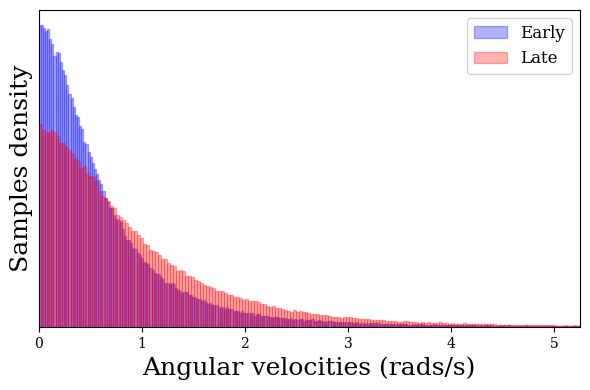

2-sided Wilcoxon rank sum test p-value: 0.0.
Rank sum test p-value (early greater than late): 1.0.
Rank sum test p-value (early less than late): 0.0.


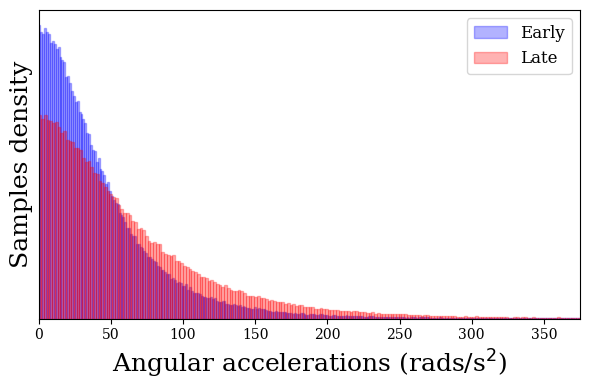

2-sided Wilcoxon rank sum test p-value: 0.0.
Rank sum test p-value (early greater than late): 1.0.
Rank sum test p-value (early less than late): 0.0.


In [28]:
plot_variable_early_vs_late(early_velocities,late_velocities,'Angular velocities (rads/s)',xlim=(0,5.25),density=True,n_bins=None)
plot_variable_early_vs_late(early_acc,late_acc,'Angular accelerations (rads/s$^2$)',xlim=(0,375),density=True,n_bins=None)

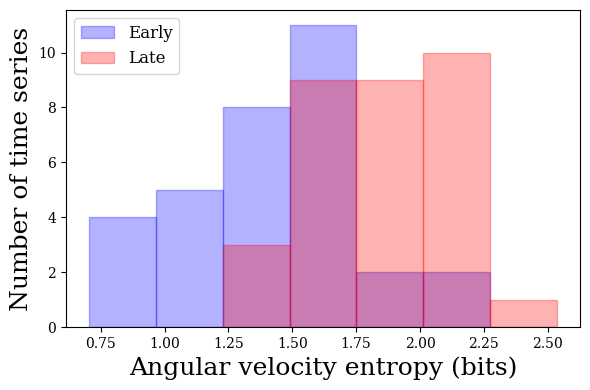

2-sided Wilcoxon rank sum test p-value: 0.0.
Rank sum test p-value (early greater than late): 1.0.
Rank sum test p-value (early less than late): 0.0.


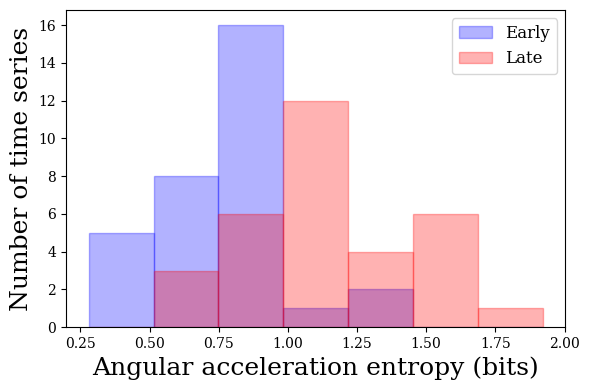

2-sided Wilcoxon rank sum test p-value: 0.0.
Rank sum test p-value (early greater than late): 1.0.
Rank sum test p-value (early less than late): 0.0.


In [34]:
plot_variable_early_vs_late(early_vel_entropy,late_vel_entropy,'Angular velocity entropy (bits)',n_bins=7,ylabel='Number of time series')#,save_fig='entropy_vel')
plot_variable_early_vs_late(early_acc_entropy,late_acc_entropy,'Angular acceleration entropy (bits)',n_bins=7,ylabel='Number of time series')#,save_fig='entropy_acc')

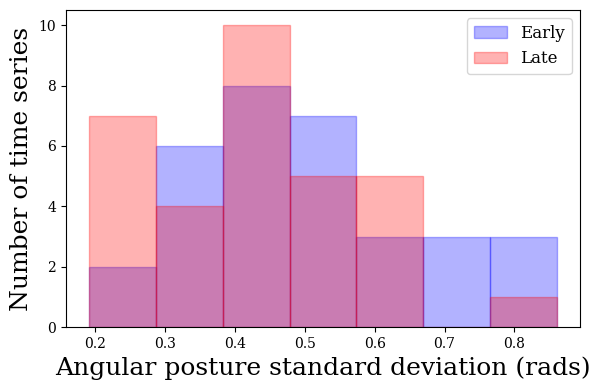

2-sided Wilcoxon rank sum test p-value: 0.1071.
Rank sum test p-value (early greater than late): 0.0536.
Rank sum test p-value (early less than late): 0.9464.


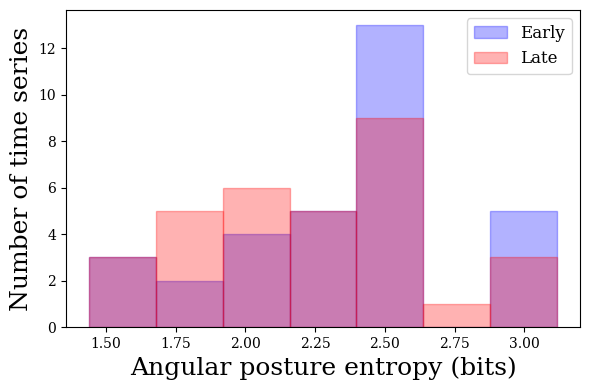

2-sided Wilcoxon rank sum test p-value: 0.2167.
Rank sum test p-value (early greater than late): 0.1084.
Rank sum test p-value (early less than late): 0.8916.


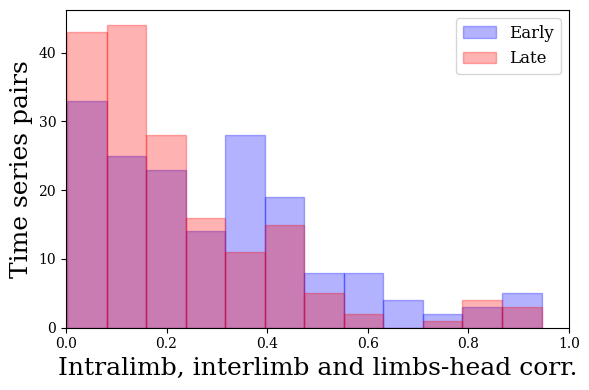

2-sided Wilcoxon rank sum test p-value: 0.0005.
Rank sum test p-value (early greater than late): 0.0003.
Rank sum test p-value (early less than late): 0.9997.


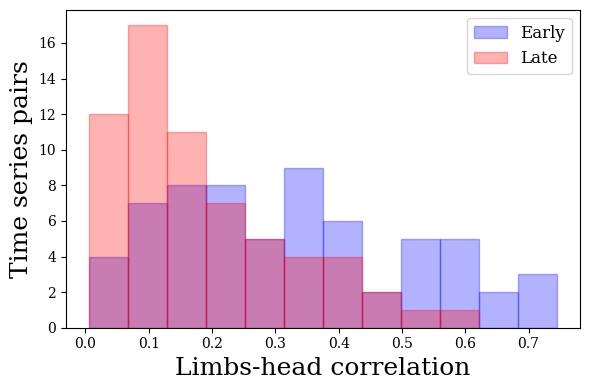

2-sided Wilcoxon rank sum test p-value: 0.0.
Rank sum test p-value (early greater than late): 0.0.
Rank sum test p-value (early less than late): 1.0.


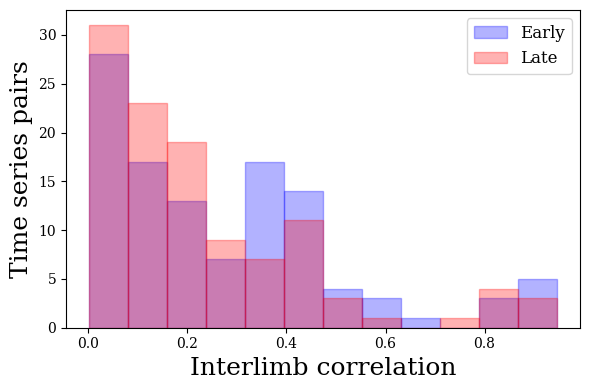

2-sided Wilcoxon rank sum test p-value: 0.1426.
Rank sum test p-value (early greater than late): 0.0713.
Rank sum test p-value (early less than late): 0.9287.


In [35]:
plot_variable_early_vs_late(early_std,late_std,'Angular posture standard deviation (rads)',n_bins=7,ylabel='Number of time series')#,save_fig='SD')
plot_variable_early_vs_late(early_entropy,late_entropy,'Angular posture entropy (bits)',n_bins=7,ylabel='Number of time series')#,save_fig='entropy')

_,_ = head_and_limbs_corr(corr_babies)
_,_ = head_with_limbs_corr(corr_babies)
_,_ = limbs_corr(corr_babies)

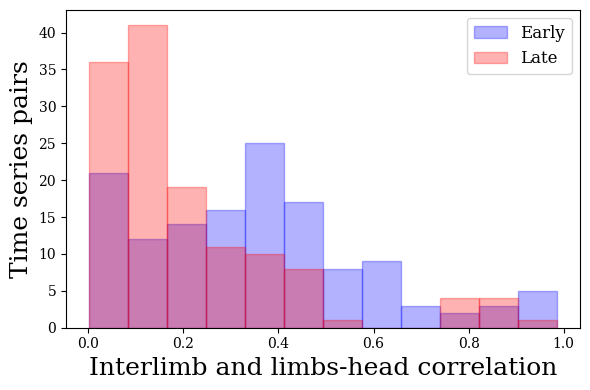

2-sided Wilcoxon rank sum test p-value: 0.0.
Rank sum test p-value (early greater than late): 0.0.
Rank sum test p-value (early less than late): 1.0.


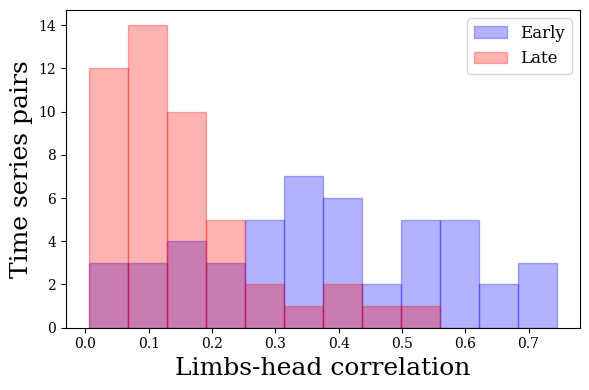

2-sided Wilcoxon rank sum test p-value: 0.0.
Rank sum test p-value (early greater than late): 0.0.
Rank sum test p-value (early less than late): 1.0.


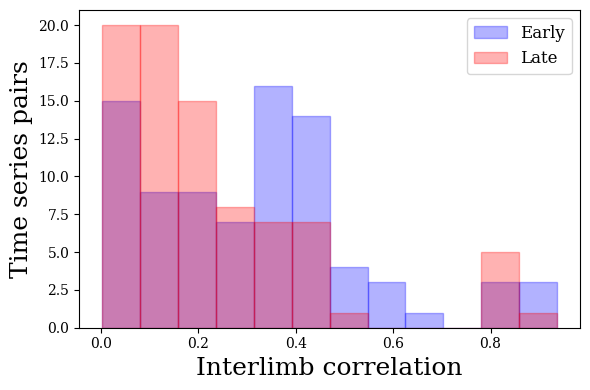

2-sided Wilcoxon rank sum test p-value: 0.0021.
Rank sum test p-value (early greater than late): 0.001.
Rank sum test p-value (early less than late): 0.999.


In [933]:
corr123 = [corr_babies[0],corr_babies[1],corr_babies[2],corr_babies[4],corr_babies[5],corr_babies[6]]
_,_ = head_and_limbs_corr(corr123,n_babies=3,plot=False)
_,_ = head_with_limbs_corr(corr123,n_babies=3,plot=False)
_,_ = limbs_corr(corr123,n_babies=3)

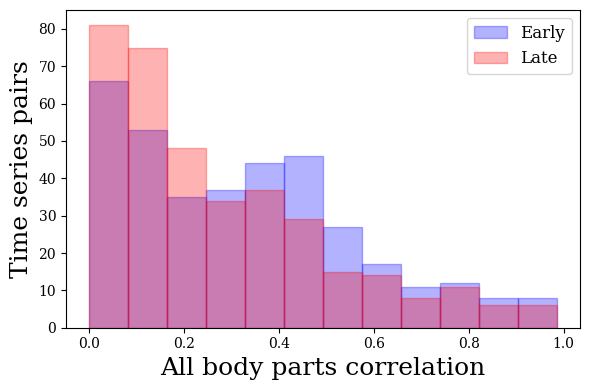

2-sided Wilcoxon rank sum test p-value: 0.0007.
Rank sum test p-value (early greater than late): 0.0003.
Rank sum test p-value (early less than late): 0.9997.


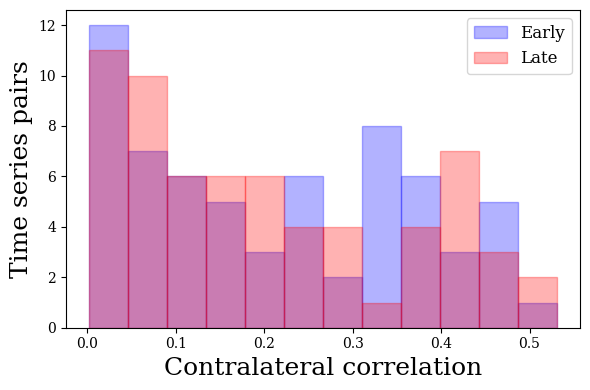

2-sided Wilcoxon rank sum test p-value: 0.6034.
Rank sum test p-value (early greater than late): 0.3017.
Rank sum test p-value (early less than late): 0.6983.


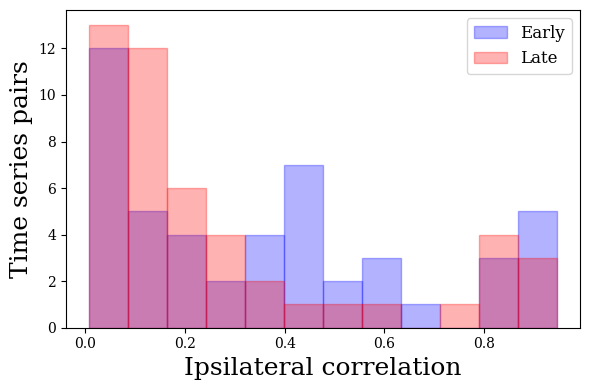

2-sided Wilcoxon rank sum test p-value: 0.1552.
Rank sum test p-value (early greater than late): 0.0776.
Rank sum test p-value (early less than late): 0.9224.


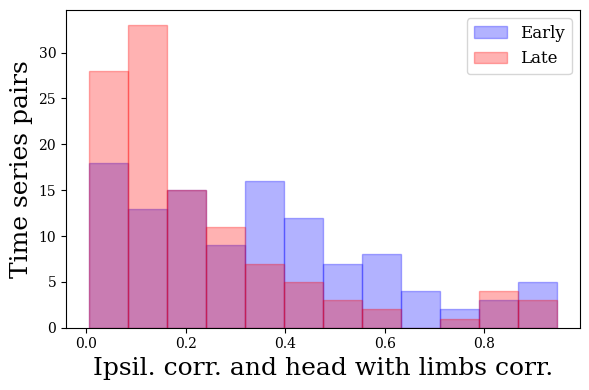

2-sided Wilcoxon rank sum test p-value: 0.0.
Rank sum test p-value (early greater than late): 0.0.
Rank sum test p-value (early less than late): 1.0.


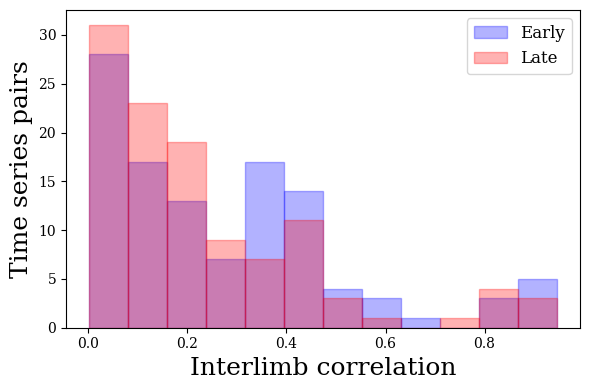

2-sided Wilcoxon rank sum test p-value: 0.1426.
Rank sum test p-value (early greater than late): 0.0713.
Rank sum test p-value (early less than late): 0.9287.


In [904]:
_,_ = all_body_corr(corr_babies)
_,_ = contralateral_corr(corr_babies)
_,_ = ipsilateral_corr(corr_babies)
_,_ = ipsilateral_and_head_corr(corr_babies)


#### Baby 1

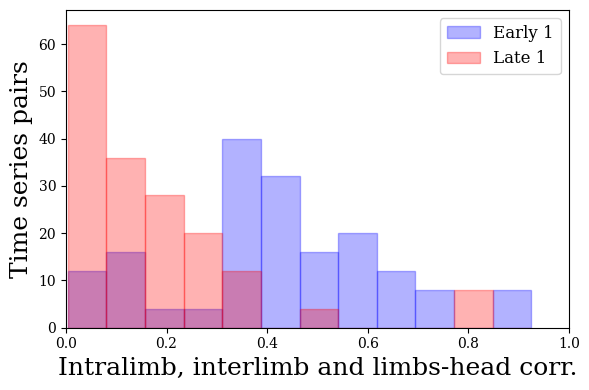

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

2-sided Wilcoxon rank sum test p-value: 0.0.
Rank sum test p-value (early greater than late): 0.0.
Rank sum test p-value (early less than late): 1.0.


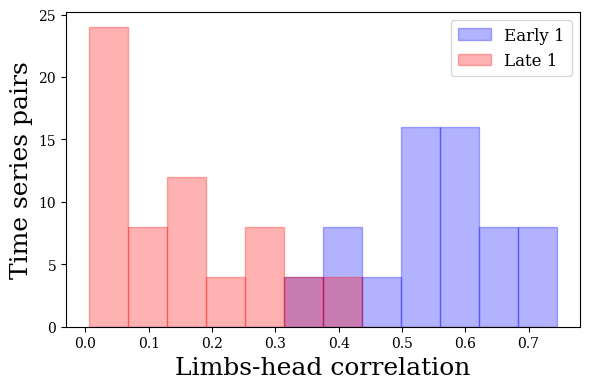

2-sided Wilcoxon rank sum test p-value: 0.0.
Rank sum test p-value (early greater than late): 0.0.
Rank sum test p-value (early less than late): 1.0.


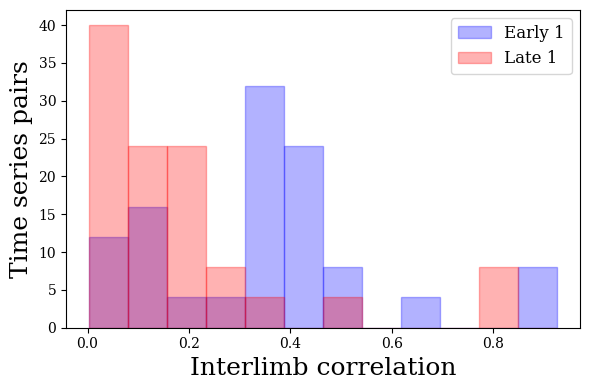

2-sided Wilcoxon rank sum test p-value: 0.0.
Rank sum test p-value (early greater than late): 0.0.
Rank sum test p-value (early less than late): 1.0.


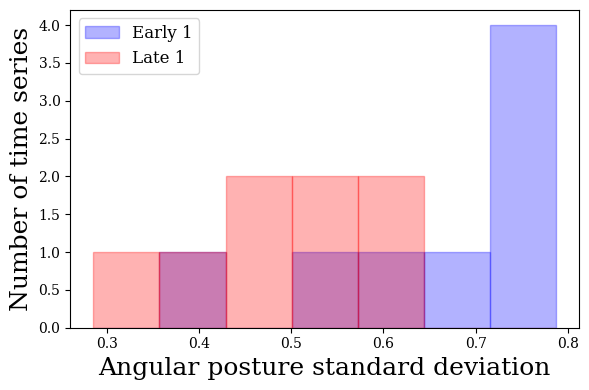

2-sided Wilcoxon rank sum test p-value: 0.0157.
Rank sum test p-value (early greater than late): 0.0079.
Rank sum test p-value (early less than late): 0.9921.


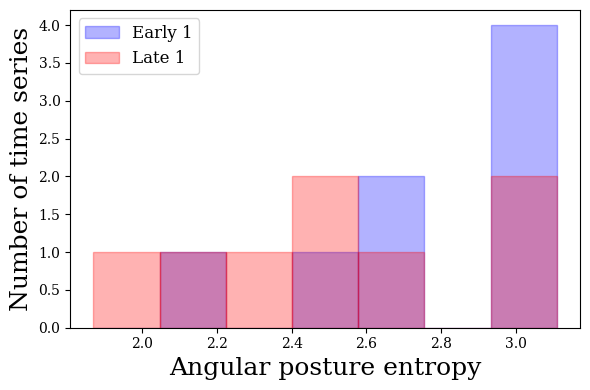

2-sided Wilcoxon rank sum test p-value: 0.0929.
Rank sum test p-value (early greater than late): 0.0464.
Rank sum test p-value (early less than late): 0.9536.


In [967]:
corr_baby1 = [corr_babies[0],corr_babies[0],corr_babies[0],corr_babies[0],
             corr_babies[4],corr_babies[4],corr_babies[4],corr_babies[4]]
_,_ = head_and_limbs_corr(corr_baby1,plot=False)
_,_ = head_with_limbs_corr(corr_baby1,plot=False)
_,_ = limbs_corr(corr_baby1)
plot_variable_early_vs_late(variables[0,vars_labels.index('L elbow std'):vars_labels.index('R leg std')+1],
                            variables[4,vars_labels.index('L elbow std'):vars_labels.index('R leg std')+1],
    'Angular posture standard deviation',n_bins=7,ylabel='Number of time series')
plot_variable_early_vs_late(variables[0,vars_labels.index('L elbow entropy'):vars_labels.index('R leg entropy')+1],
                            variables[4,vars_labels.index('L elbow entropy'):vars_labels.index('R leg entropy')+1],
    'Angular posture entropy',n_bins=7,ylabel='Number of time series')

### Baby 2

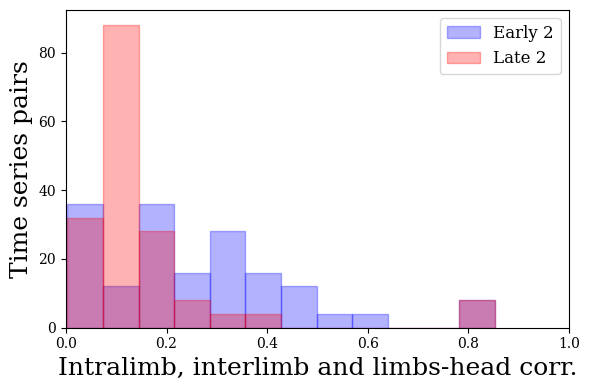

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

2-sided Wilcoxon rank sum test p-value: 0.0.
Rank sum test p-value (early greater than late): 0.0.
Rank sum test p-value (early less than late): 1.0.


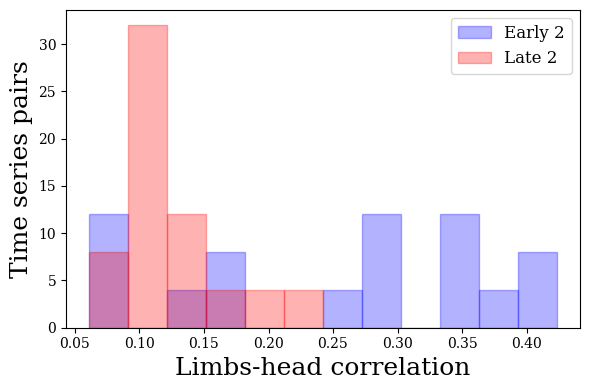

2-sided Wilcoxon rank sum test p-value: 0.0.
Rank sum test p-value (early greater than late): 0.0.
Rank sum test p-value (early less than late): 1.0.


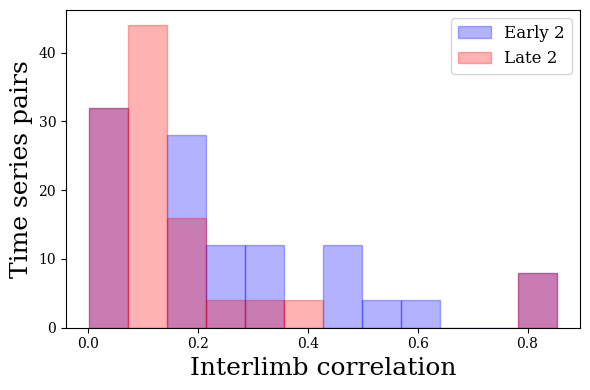

2-sided Wilcoxon rank sum test p-value: 0.0001.
Rank sum test p-value (early greater than late): 0.0.
Rank sum test p-value (early less than late): 1.0.


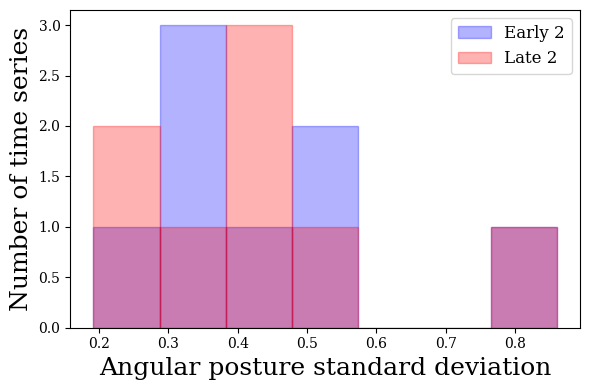

2-sided Wilcoxon rank sum test p-value: 0.8336.
Rank sum test p-value (early greater than late): 0.4168.
Rank sum test p-value (early less than late): 0.5832.


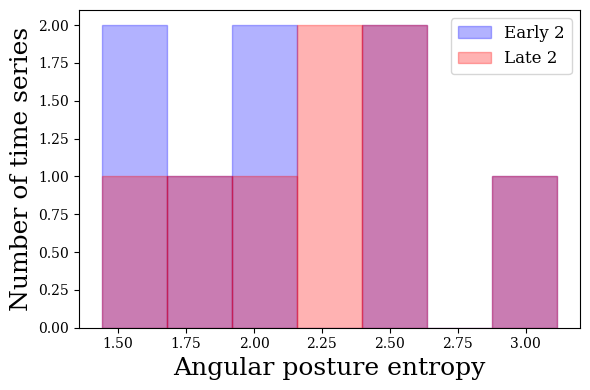

2-sided Wilcoxon rank sum test p-value: 0.5286.
Rank sum test p-value (early greater than late): 0.7357.
Rank sum test p-value (early less than late): 0.2643.


In [969]:
corr_baby2 = [corr_babies[1],corr_babies[1],corr_babies[1],corr_babies[1],
             corr_babies[5],corr_babies[5],corr_babies[5],corr_babies[5]]
_,_ = head_and_limbs_corr(corr_baby2,plot=False)
_,_ = head_with_limbs_corr(corr_baby2)
_,_ = limbs_corr(corr_baby2)
plot_variable_early_vs_late(variables[1,vars_labels.index('L elbow std'):vars_labels.index('R leg std')+1],
                            variables[5,vars_labels.index('L elbow std'):vars_labels.index('R leg std')+1],
    'Angular posture standard deviation',n_bins=7,ylabel='Number of time series')
plot_variable_early_vs_late(variables[1,vars_labels.index('L elbow entropy'):vars_labels.index('R leg entropy')+1],
                            variables[5,vars_labels.index('L elbow entropy'):vars_labels.index('R leg entropy')+1],
    'Angular posture entropy',n_bins=7,ylabel='Number of time series')

### Baby 3

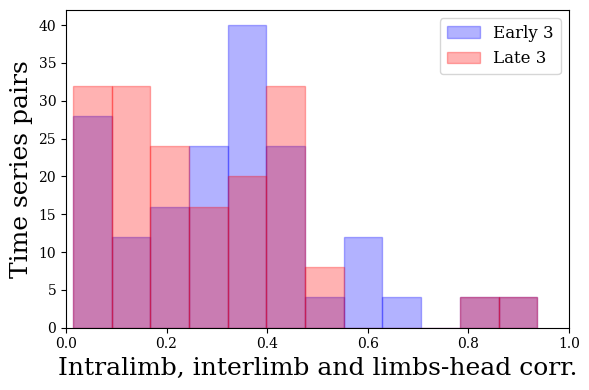

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

2-sided Wilcoxon rank sum test p-value: 0.0082.
Rank sum test p-value (early greater than late): 0.0041.
Rank sum test p-value (early less than late): 0.9959.


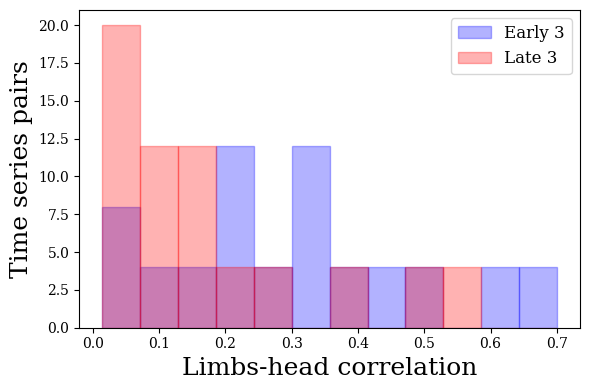

2-sided Wilcoxon rank sum test p-value: 0.0.
Rank sum test p-value (early greater than late): 0.0.
Rank sum test p-value (early less than late): 1.0.


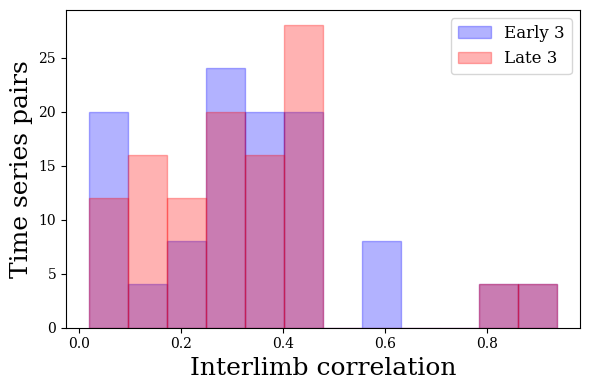

2-sided Wilcoxon rank sum test p-value: 0.5526.
Rank sum test p-value (early greater than late): 0.2763.
Rank sum test p-value (early less than late): 0.7237.


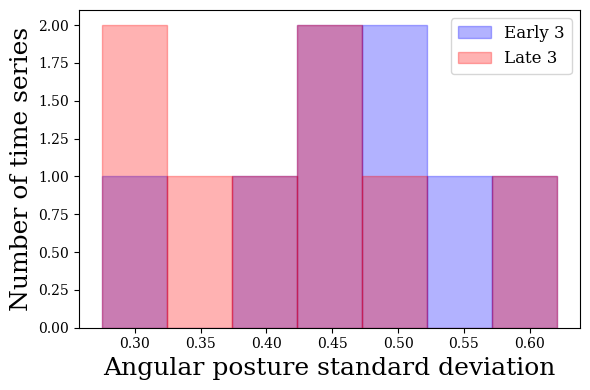

2-sided Wilcoxon rank sum test p-value: 0.4622.
Rank sum test p-value (early greater than late): 0.2311.
Rank sum test p-value (early less than late): 0.7689.


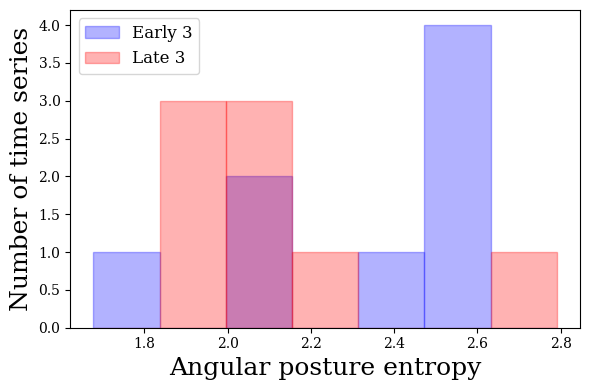

2-sided Wilcoxon rank sum test p-value: 0.1722.
Rank sum test p-value (early greater than late): 0.0861.
Rank sum test p-value (early less than late): 0.9139.


In [975]:
corr_baby3 = [corr_babies[2],corr_babies[2],corr_babies[2],corr_babies[2],
             corr_babies[6],corr_babies[6],corr_babies[6],corr_babies[6]]
_,_ = head_and_limbs_corr(corr_baby3,plot=False)
_,_ = head_with_limbs_corr(corr_baby3)
_,_ = limbs_corr(corr_baby3)
plot_variable_early_vs_late(variables[2,vars_labels.index('L elbow std'):vars_labels.index('R leg std')+1],
                            variables[6,vars_labels.index('L elbow std'):vars_labels.index('R leg std')+1],
    'Angular posture standard deviation',n_bins=7,ylabel='Number of time series')
plot_variable_early_vs_late(variables[2,vars_labels.index('L elbow entropy'):vars_labels.index('R leg entropy')+1],
                            variables[6,vars_labels.index('L elbow entropy'):vars_labels.index('R leg entropy')+1],
    'Angular posture entropy',n_bins=7,ylabel='Number of time series')

### Baby 4

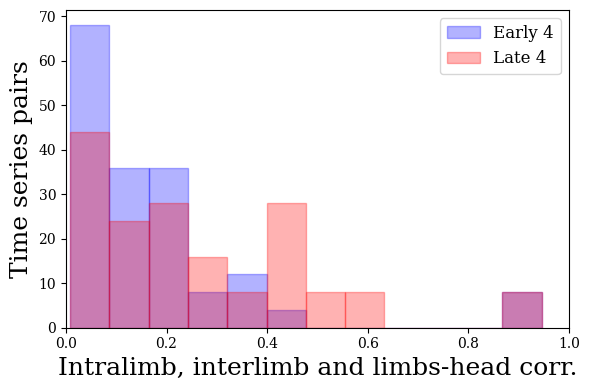

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

2-sided Wilcoxon rank sum test p-value: 0.0.
Rank sum test p-value (early greater than late): 1.0.
Rank sum test p-value (early less than late): 0.0.


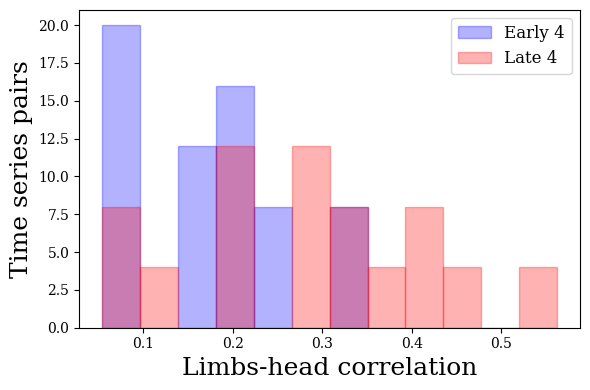

2-sided Wilcoxon rank sum test p-value: 0.0.
Rank sum test p-value (early greater than late): 1.0.
Rank sum test p-value (early less than late): 0.0.


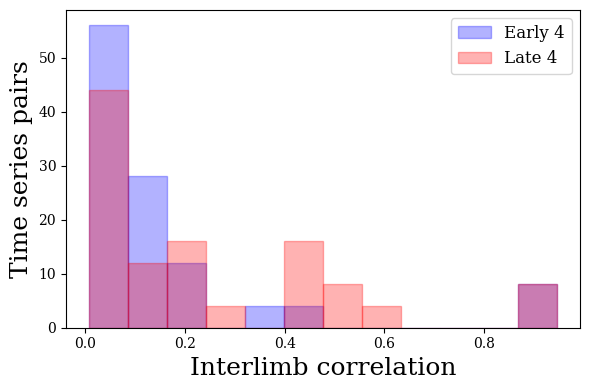

2-sided Wilcoxon rank sum test p-value: 0.0003.
Rank sum test p-value (early greater than late): 0.9999.
Rank sum test p-value (early less than late): 0.0001.


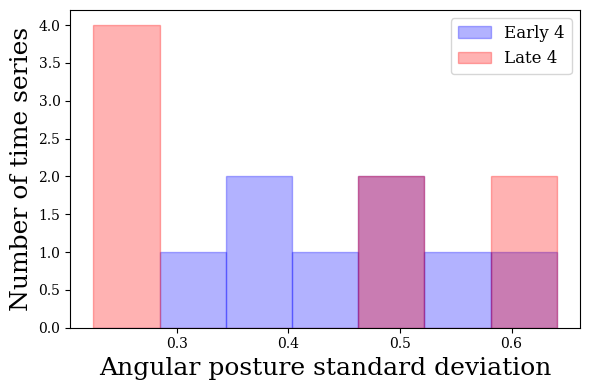

2-sided Wilcoxon rank sum test p-value: 0.5286.
Rank sum test p-value (early greater than late): 0.2643.
Rank sum test p-value (early less than late): 0.7357.


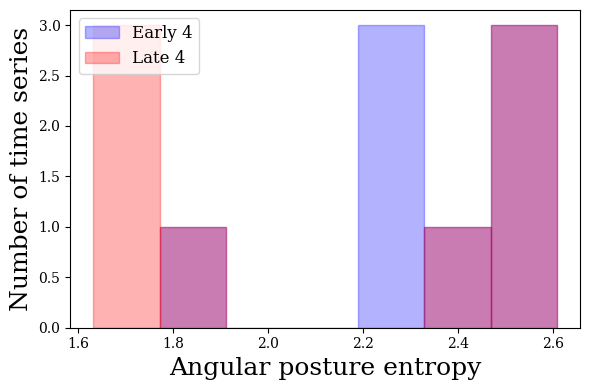

2-sided Wilcoxon rank sum test p-value: 0.3446.
Rank sum test p-value (early greater than late): 0.1723.
Rank sum test p-value (early less than late): 0.8277.


In [973]:
corr_baby4 = [corr_babies[3],corr_babies[3],corr_babies[3],corr_babies[3],
             corr_babies[7],corr_babies[7],corr_babies[7],corr_babies[7]]
_,_ = head_and_limbs_corr(corr_baby4,plot=False)
_,_ = head_with_limbs_corr(corr_baby4)
_,_ = limbs_corr(corr_baby4)
plot_variable_early_vs_late(variables[3,vars_labels.index('L elbow std'):vars_labels.index('R leg std')+1],
                            variables[7,vars_labels.index('L elbow std'):vars_labels.index('R leg std')+1],
    'Angular posture standard deviation',n_bins=7,ylabel='Number of time series')
plot_variable_early_vs_late(variables[3,vars_labels.index('L elbow entropy'):vars_labels.index('R leg entropy')+1],
                            variables[7,vars_labels.index('L elbow entropy'):vars_labels.index('R leg entropy')+1],
    'Angular posture entropy',n_bins=7,ylabel='Number of time series')